In [56]:
import os
import time
from operator import itemgetter  # used for sorting

import altair as alt
import pandas as pd  # makes manipulating the data easier
import requests
from IPython.display import clear_output
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
from tqdm.auto import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import time
from operator import itemgetter  # used for sorting

import altair as alt
import pandas as pd  # makes manipulating the data easier
import requests
from IPython.display import clear_output
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
from tqdm.auto import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# Make sure data directory exists
os.makedirs("docs", exist_ok=True)

# Create a session that will automatically retry on server errors
s = requests.Session()
retries = Retry(total=5, backoff_factor=1, status_forcelist=[502, 503, 504])
s.mount("http://", HTTPAdapter(max_retries=retries))
s.mount("https://", HTTPAdapter(max_retries=retries))

In [ ]:
#Read in pickles files as dataframes

In [57]:
#load in the data from the csv file and create a dataframe called df_bushfire
df_bushfire = pd.read_csv("bushfire_data_test_processed.csv")
#load in the data from the csv file and create a dataframe called total_trove
total_trove = pd.read_csv("total_articles_by_year.csv")

In [58]:
# Preprocessing to get data counts for bushfire occurance. 

# FIXING HERE!
# Drop duplicate entries using the 'url' column to ensure we are counting unique articles, and not bushfire mentions within the same article
df_bushfire = df_bushfire.drop_duplicates(subset=['url'])

# Convert 'date' column to datetime
df_bushfire['date'] = pd.to_datetime(df_bushfire['date'])

# Extracting just the date part from the datetime
df_bushfire['date_only'] = df_bushfire['date'].dt.date

# Count the number of entries for each date
date_counts = df_bushfire['date_only'].value_counts()

# Sort the counts by date
date_counts = date_counts.sort_index()

# Convert the Series to a DataFrame for plotting with seaborn
date_counts_df = date_counts.reset_index()
date_counts_df.columns = ['Date', 'Number of Entries']


# Graph of Bushfire Articles as Percentage of Total Trove Articles
Total Trove Article dataset was downloaded from https://github.com/wragge/trove-newspaper-totals which had completed most recent harvest 24 December 2023. This analysis uses the 'processed' dataset that contains 120260 entries (For evaluation of pre-processing steps see Preprocessing.ipynb).

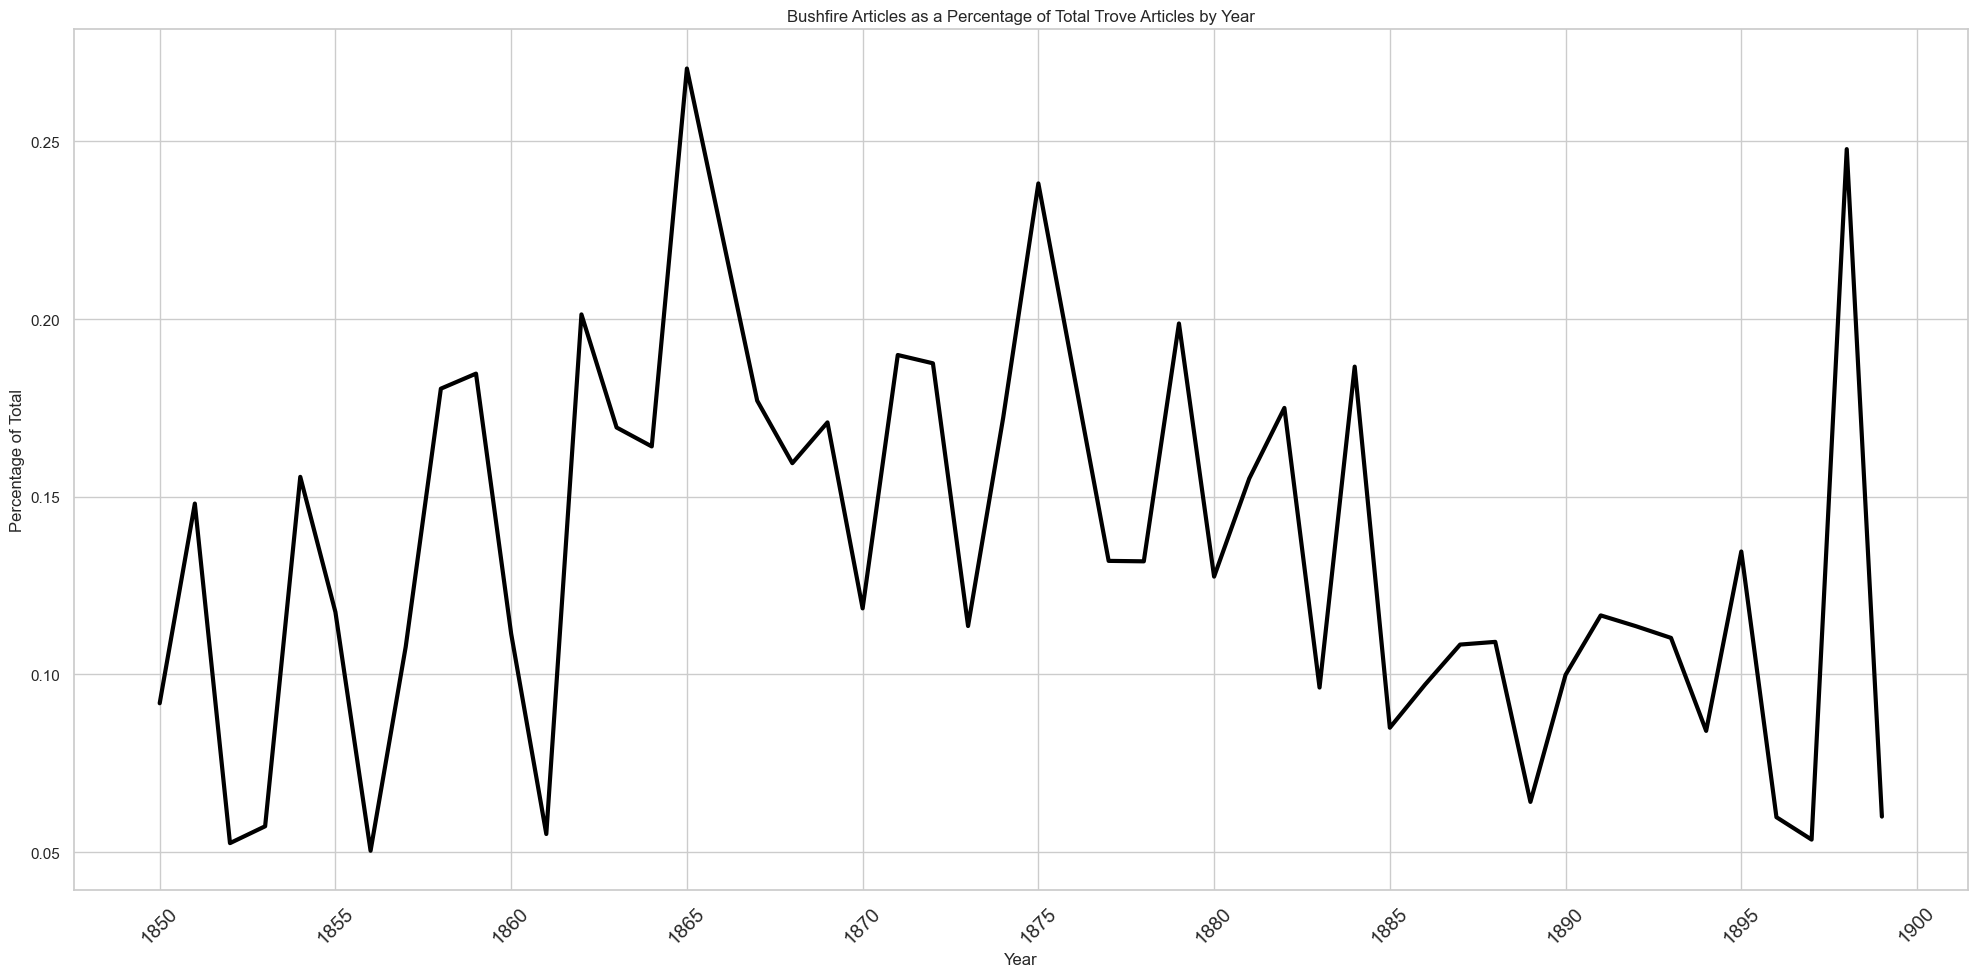

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings

# Filter out warnings
warnings.filterwarnings('ignore', category=FutureWarning)

sns.set_theme(style="whitegrid")

# Set the default font size for all plot elements
plt.rcParams.update({'font.size': 14})  # You can adjust the size as needed

# Assuming date_counts_df already has the 'Date' and 'Number of Entries' columns

# Convert 'Date' column to datetime and extract the year
date_counts_df['Year'] = pd.to_datetime(date_counts_df['Date']).dt.year

# Filter the dates between 1850 and 1900 and group by 'Year', summing 'Number of Entries'
date_counts_df = date_counts_df[(date_counts_df['Year'] >= 1850) & (date_counts_df['Year'] <= 1900)]
yearly_counts = date_counts_df.groupby('Year')['Number of Entries'].sum().reset_index()

# Create a new DataFrame for percentages
df_percentages = pd.DataFrame(columns=['Year', 'Percentage of Total'])

# Iterate through the aggregated DataFrame
for index, row in yearly_counts.iterrows():
    year = row['Year']
    number_of_entries = row['Number of Entries']
    
    # Check if the year exists in total_trove DataFrame
    if year in total_trove['year'].values:
        total = total_trove.loc[total_trove['year'] == year]['total'].iloc[0]
        percentage = (number_of_entries / total) * 100
        df_percentages = df_percentages.append({'Year': year, 'Percentage of Total': percentage}, ignore_index=True)

# Plotting the data as a line graph
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='Percentage of Total', data=df_percentages, color='black', linewidth=3)

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title('Bushfire Articles as a Percentage of Total Trove Articles by Year')
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()


The graph 'Bushfire Articles as Percentage of Total Trove Articles' plots bushfire occurance against total articles in trove. 




# Graph of Bushfire Articles by Year

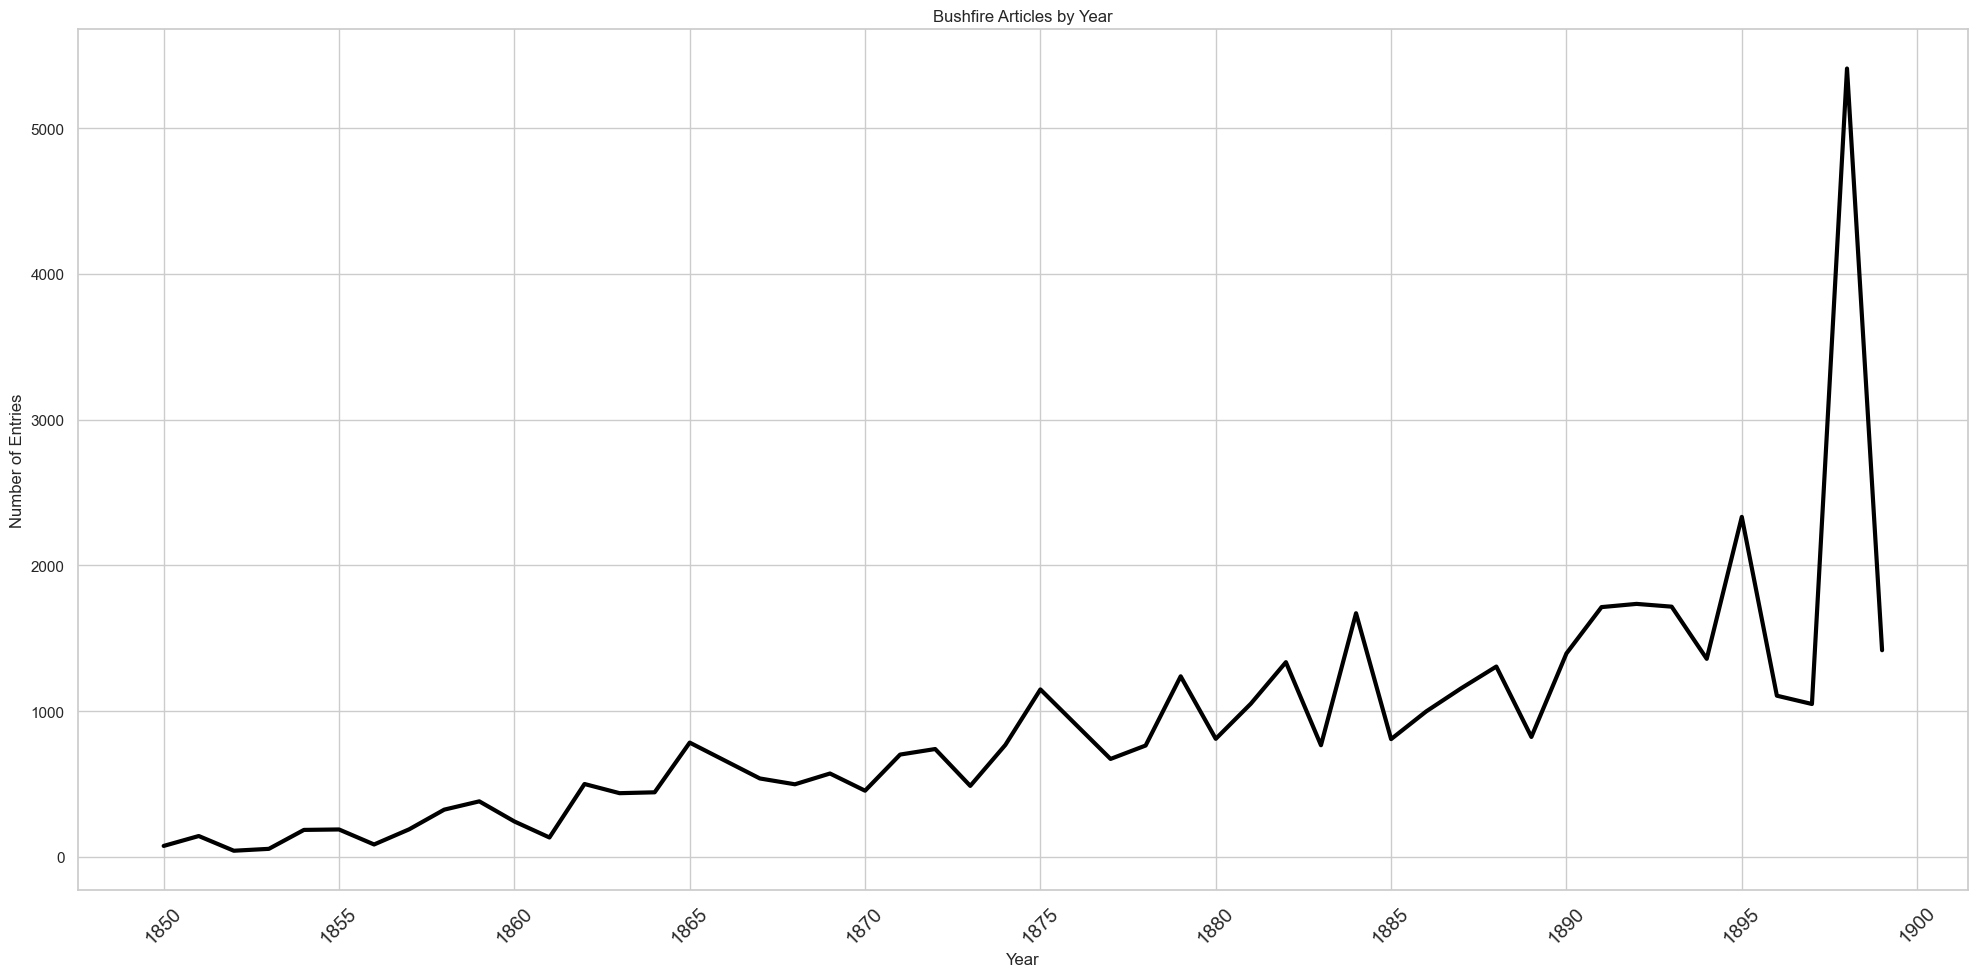

In [60]:
#plot the yearly counts of bushfire articles as line graph 
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='Number of Entries', data=yearly_counts, color='black', linewidth=3)

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title('Bushfire Articles by Year')
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()
    

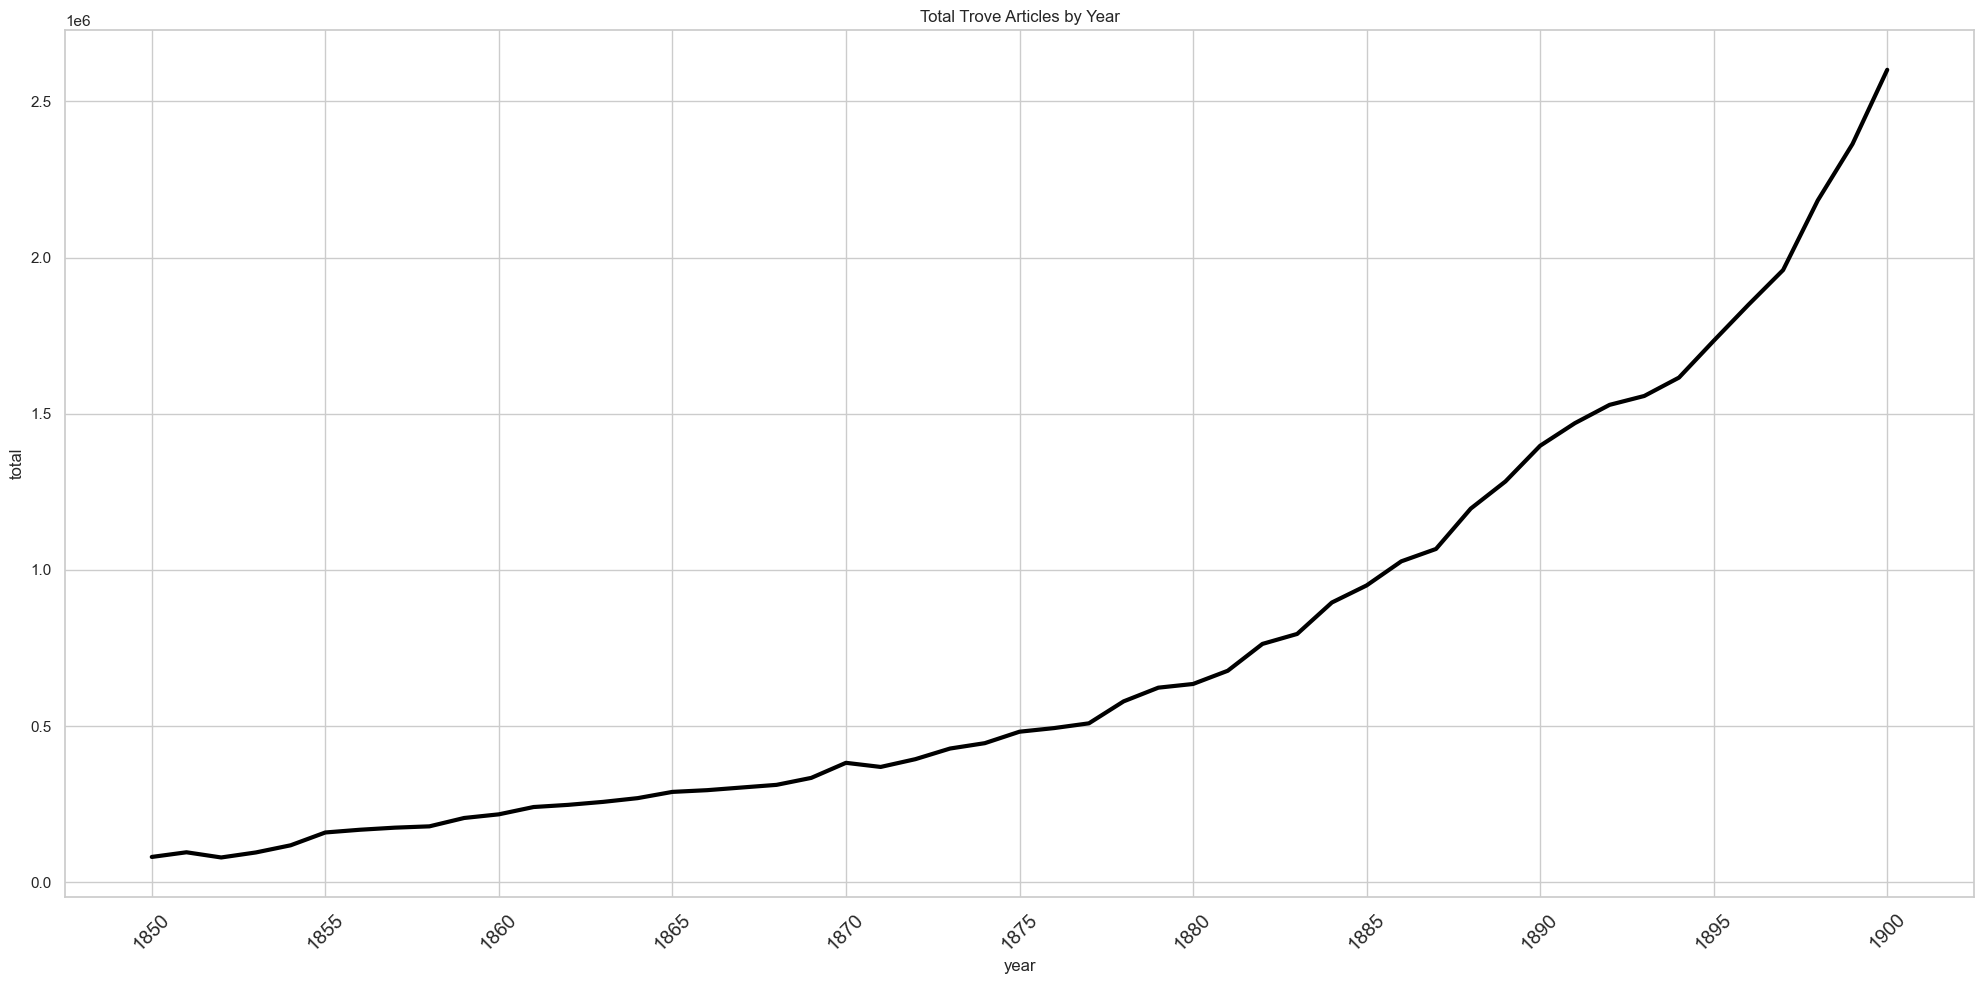

In [61]:
# Plot total_trove as a line graph, but stop at 1900
sns.set_theme(style="whitegrid")

# Filter the dates between 1850 and 1900, create new DataFrame called total_trove_1850_1900
total_trove_1850_1900 = total_trove[(total_trove['year'] >= 1850) & (total_trove['year'] <= 1900)]

# Plot the data as a line graph
plt.figure(figsize=(20, 10))
sns.lineplot(x='year', y='total', data=total_trove_1850_1900, color='black', linewidth=3)

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title('Total Trove Articles by Year')
plt.xticks(rotation=45, fontsize=14)

plt.tight_layout()
plt.show()


# Analysis of change in reporting over time
This analysis will use the the unprocessed dataframe 'bushfire_data_test.csv' that contains 331947 articles from 1850 to 1899. We will measure the change in word count reporting over time.

In [62]:
# This code is used to compare the number of unique entries between two datasets

#load in the data from the csv file and create a dataframe called df_bushfire_test.csv
df_bushfire_total = pd.read_csv("bushfire_data_test.csv") 
#use the 'url' column to count the number of unique entries
print("The number of unique entries in the unprocessed dataset: " + str(df_bushfire_total['url'].nunique()))
# count the number of unique entries in the 'url' column in the df_bushfire dataframe (processed)
# and print this to the console
print("The number of unique entries in the processed dataset: " + str(df_bushfire['url'].nunique()))


The number of unique entries in the unprocessed dataset: 62988
The number of unique entries in the processed dataset: 42754


Because there is a difference of 20,234 articles between the datasets, we will use the unprocessed dataset for the analysis of change of words over time, and use the processed dataset for topic modelling so that we can segment results by state. 

# Graphs of Unprocesed Bushfire Dataset
We will conduct the same analysis for the unprocessed bushfire dataset to check there are not significant differences between the two datasets. 

In [63]:
# Preprocessing of complete bushfire df
df_bushfire_unprocessed = pd.read_csv("bushfire_data_test.csv")

# Preprocessing to get data counts for bushfire occurance. 

# FIXING HERE!
# Drop duplicate entries using the 'url' column to ensure we are counting unique articles, and not bushfire mentions within the same article
df_bushfire_unprocessed = df_bushfire_unprocessed.drop_duplicates(subset=['url'])

# Convert 'date' column to datetime
df_bushfire_unprocessed['date'] = pd.to_datetime(df_bushfire_unprocessed['date'])

# Extracting just the date part from the datetime
df_bushfire_unprocessed['date_only'] = df_bushfire_unprocessed['date'].dt.date

# Count the number of entries for each date
date_counts_unprocessed = df_bushfire_unprocessed['date_only'].value_counts()

# Sort the counts by date
date_counts_unprocessed = date_counts_unprocessed.sort_index()

# Convert the Series to a DataFrame for plotting with seaborn
date_counts_unprocessed_df = date_counts_unprocessed.reset_index()
date_counts_unprocessed_df.columns = ['Date', 'Number of Entries']


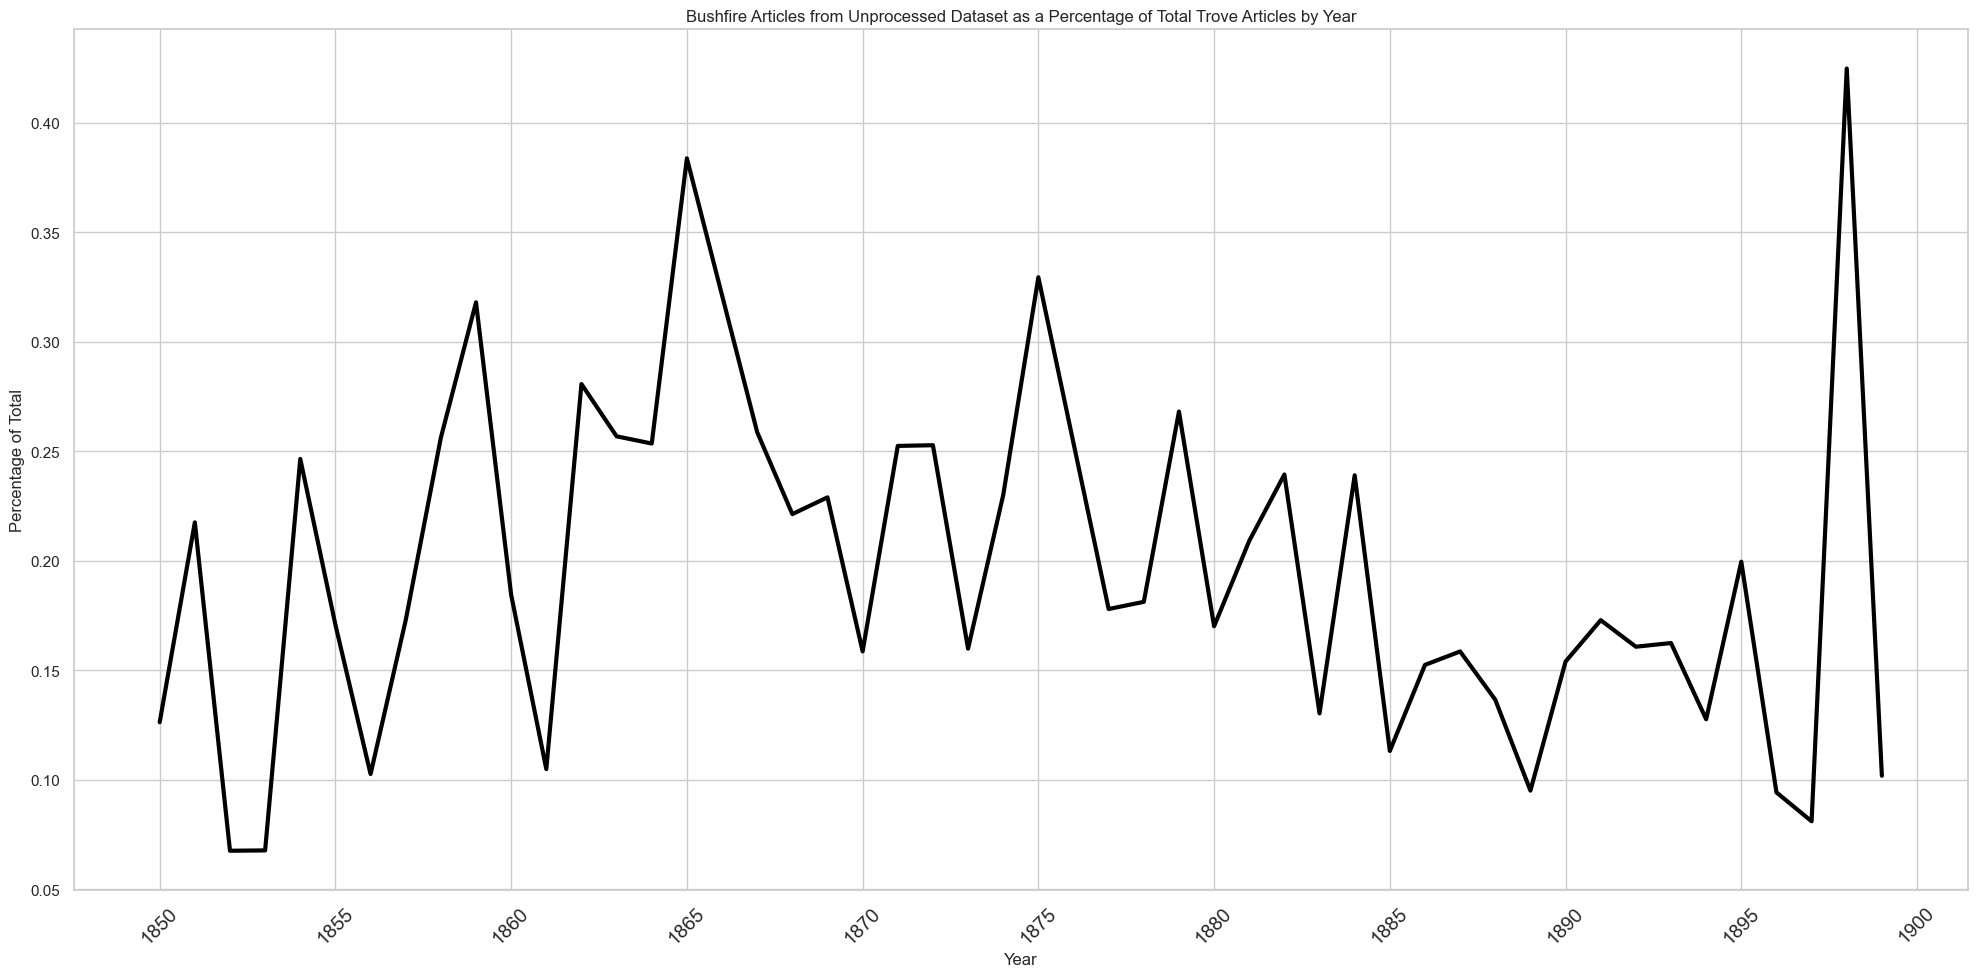

In [64]:


# Filter out warnings
warnings.filterwarnings('ignore', category=FutureWarning)

sns.set_theme(style="whitegrid")

# Set the default font size for all plot elements
plt.rcParams.update({'font.size': 14})  # You can adjust the size as needed

# Assuming date_counts_unprocessed_df already has the 'Date' and 'Number of Entries' columns

# Convert 'Date' column to datetime and extract the year
date_counts_unprocessed_df['Year'] = pd.to_datetime(date_counts_unprocessed_df['Date']).dt.year

# Filter the dates between 1850 and 1900 and group by 'Year', summing 'Number of Entries'
date_counts_unprocessed_df = date_counts_unprocessed_df[(date_counts_unprocessed_df['Year'] >= 1850) & (date_counts_unprocessed_df['Year'] <= 1900)]
yearly_counts_unprocessed = date_counts_unprocessed_df.groupby('Year')['Number of Entries'].sum().reset_index()

# Create a new DataFrame for percentages
df_percentages_unprocessed = pd.DataFrame(columns=['Year', 'Percentage of Total'])

# Iterate through the aggregated DataFrame
for index, row in yearly_counts_unprocessed.iterrows():
    year = row['Year']
    number_of_entries = row['Number of Entries']
    
    # Check if the year exists in total_trove DataFrame
    if year in total_trove['year'].values:
        total = total_trove.loc[total_trove['year'] == year]['total'].iloc[0]
        percentage = (number_of_entries / total) * 100
        df_percentages_unprocessed = df_percentages_unprocessed.append({'Year': year, 'Percentage of Total': percentage}, ignore_index=True)

# Plotting the data as a line graph
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='Percentage of Total', data=df_percentages_unprocessed, color='black', linewidth=3)

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title('Bushfire Articles from Unprocessed Dataset as a Percentage of Total Trove Articles by Year')
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()


# Graph of Bushfire Articles by Year from Unprocessed Dataset

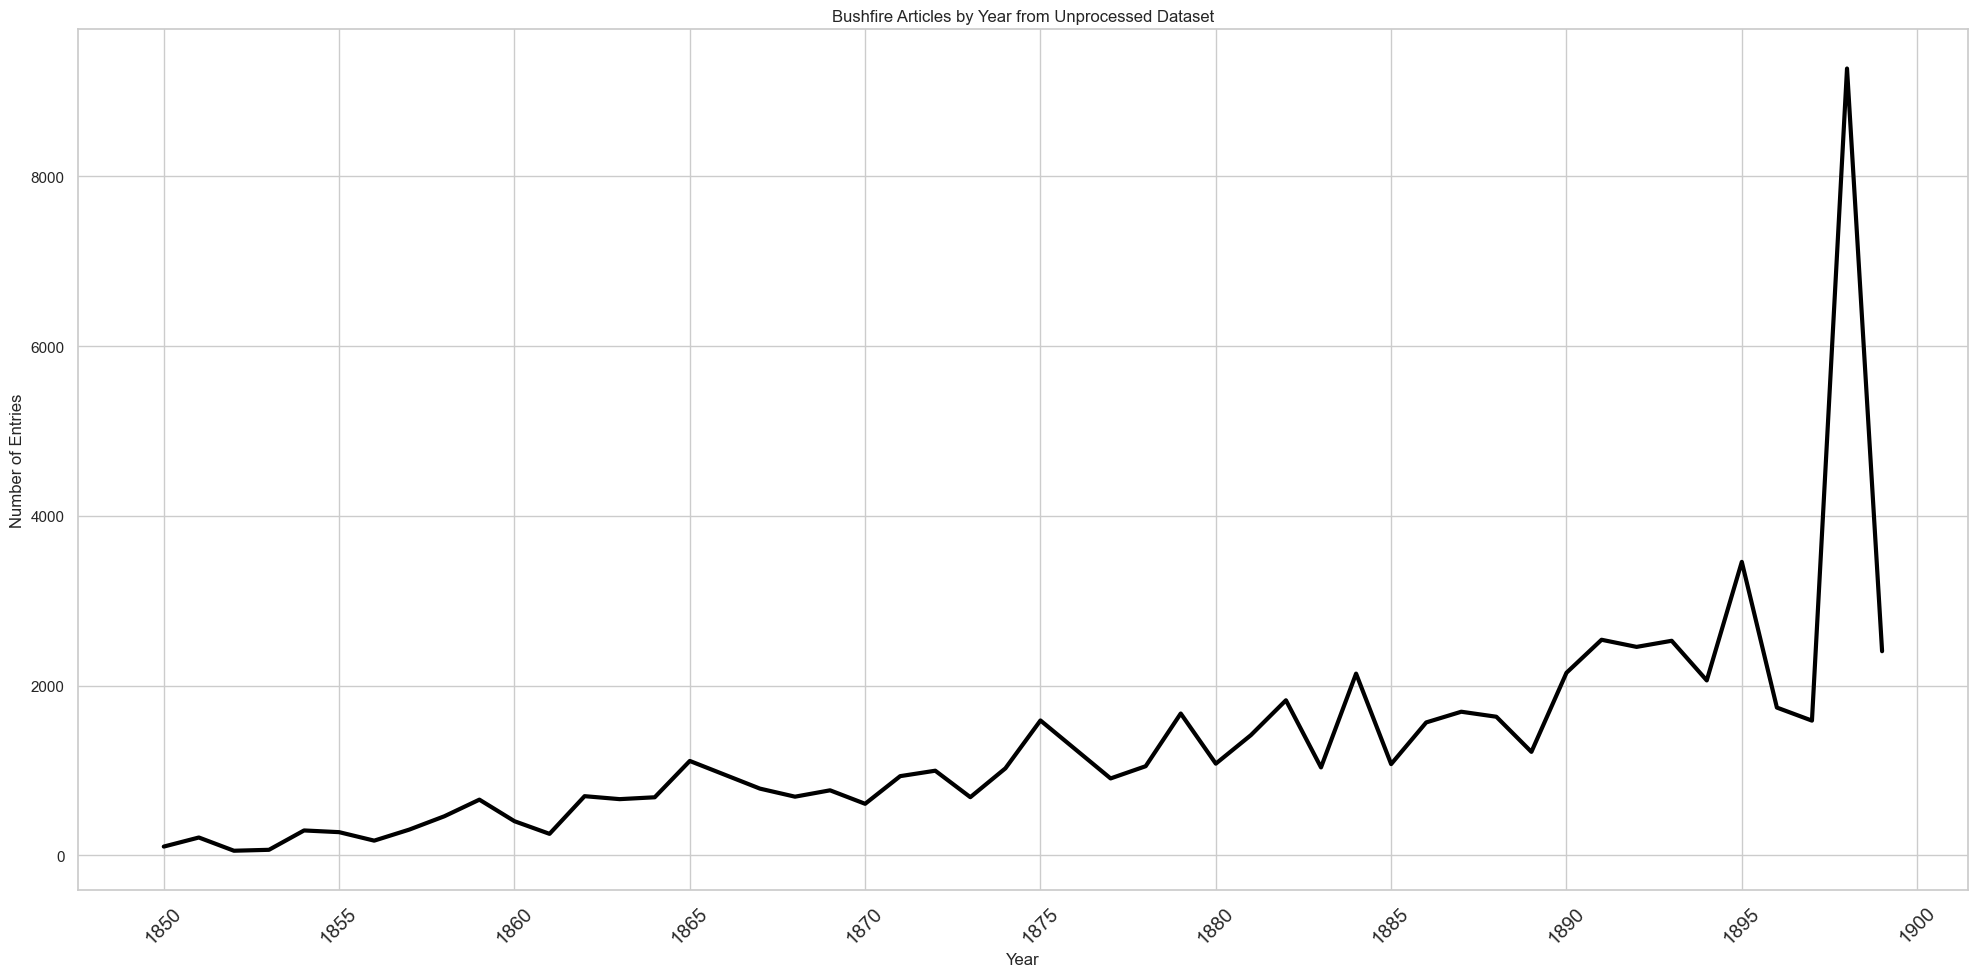

In [65]:
#plot the yearly counts of bushfire articles as line graph 
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='Number of Entries', data=yearly_counts_unprocessed, color='black', linewidth=3)

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title('Bushfire Articles by Year from Unprocessed Dataset')
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()

# Graph of Unprocessed Bushfire Dataset Measured Against Processed Bushfire Dataset as Proportion of Total Trove Articles

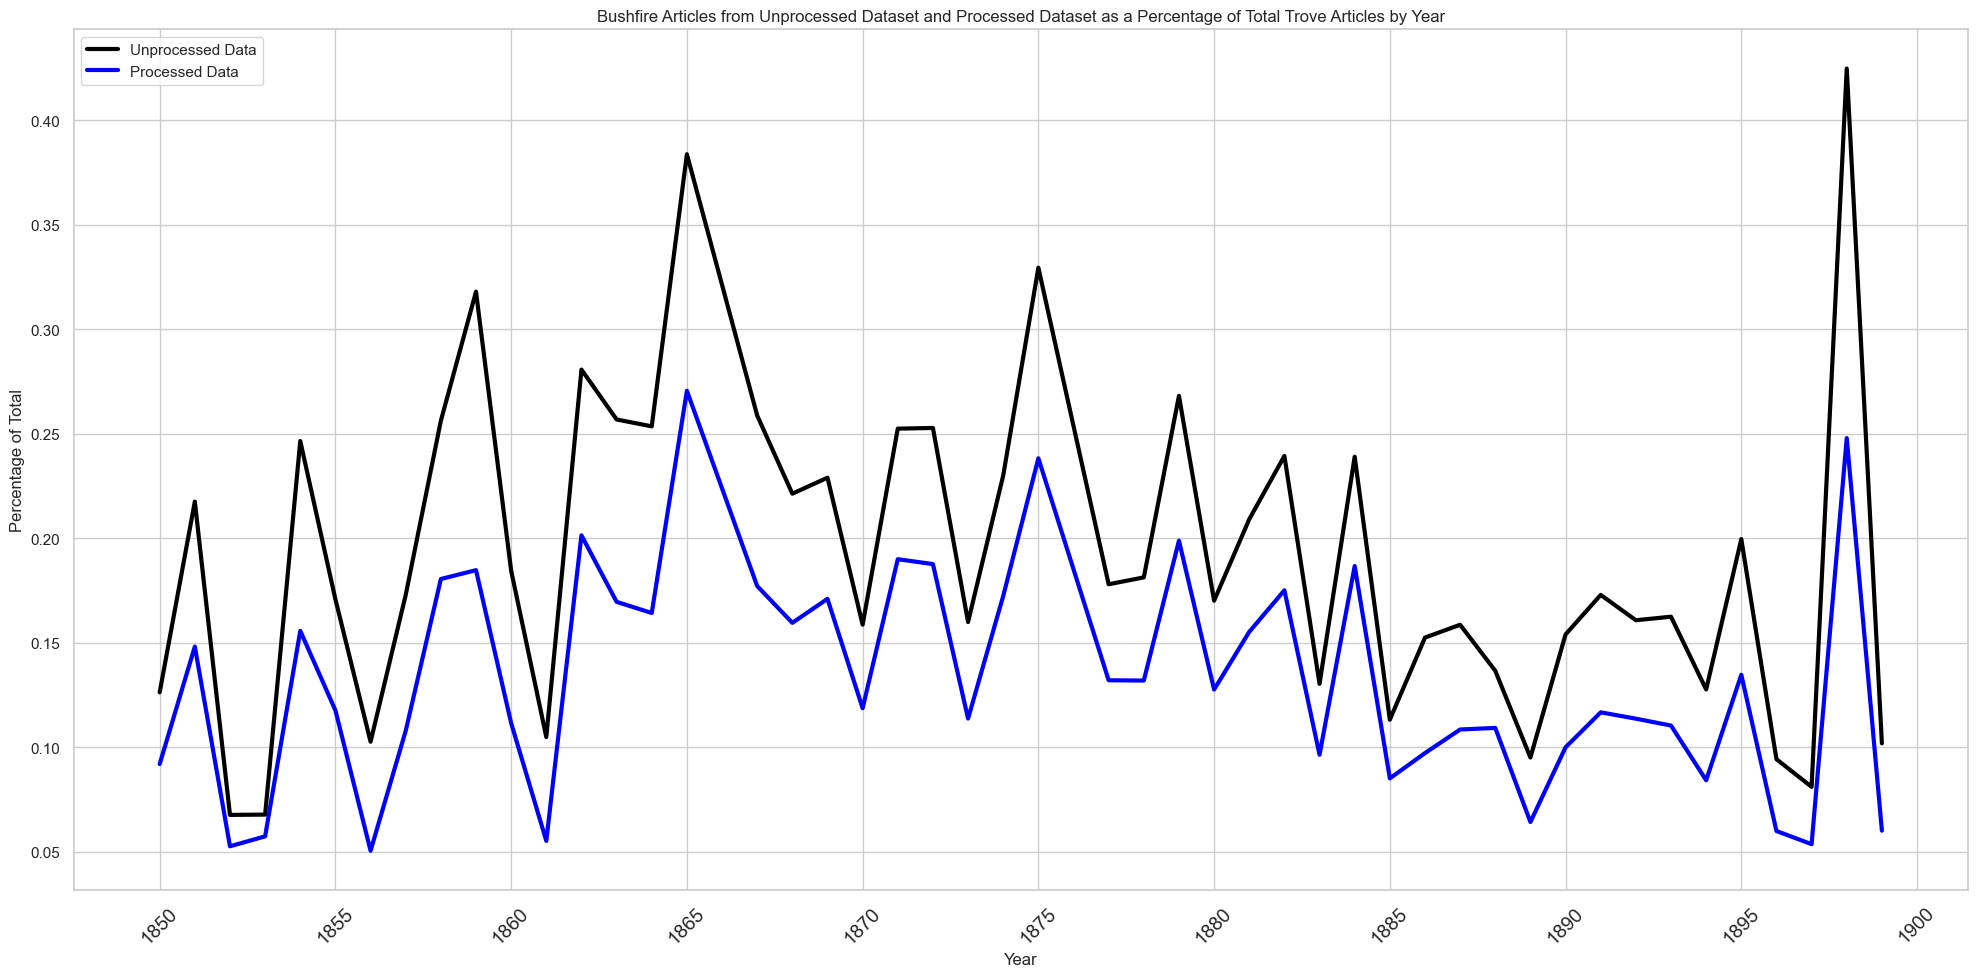

In [66]:
# Plotting the data as a line graph
plt.figure(figsize=(20, 10))

# First Line
sns.lineplot(x='Year', y='Percentage of Total', data=df_percentages_unprocessed, color='black', linewidth=3, label='Unprocessed Data')

# Second Line
sns.lineplot(x='Year', y='Percentage of Total', data=df_percentages, color='blue', linewidth=3, label='Processed Data')

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

# Add title and format x-ticks
plt.title('Bushfire Articles from Unprocessed Dataset and Processed Dataset as a Percentage of Total Trove Articles by Year')
plt.xticks(rotation=45, fontsize=14)

# Display the legend
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Graph of Total Article Count of Unprocessed Bushfire Dataset Measured Against Processed Bushfire Dataset

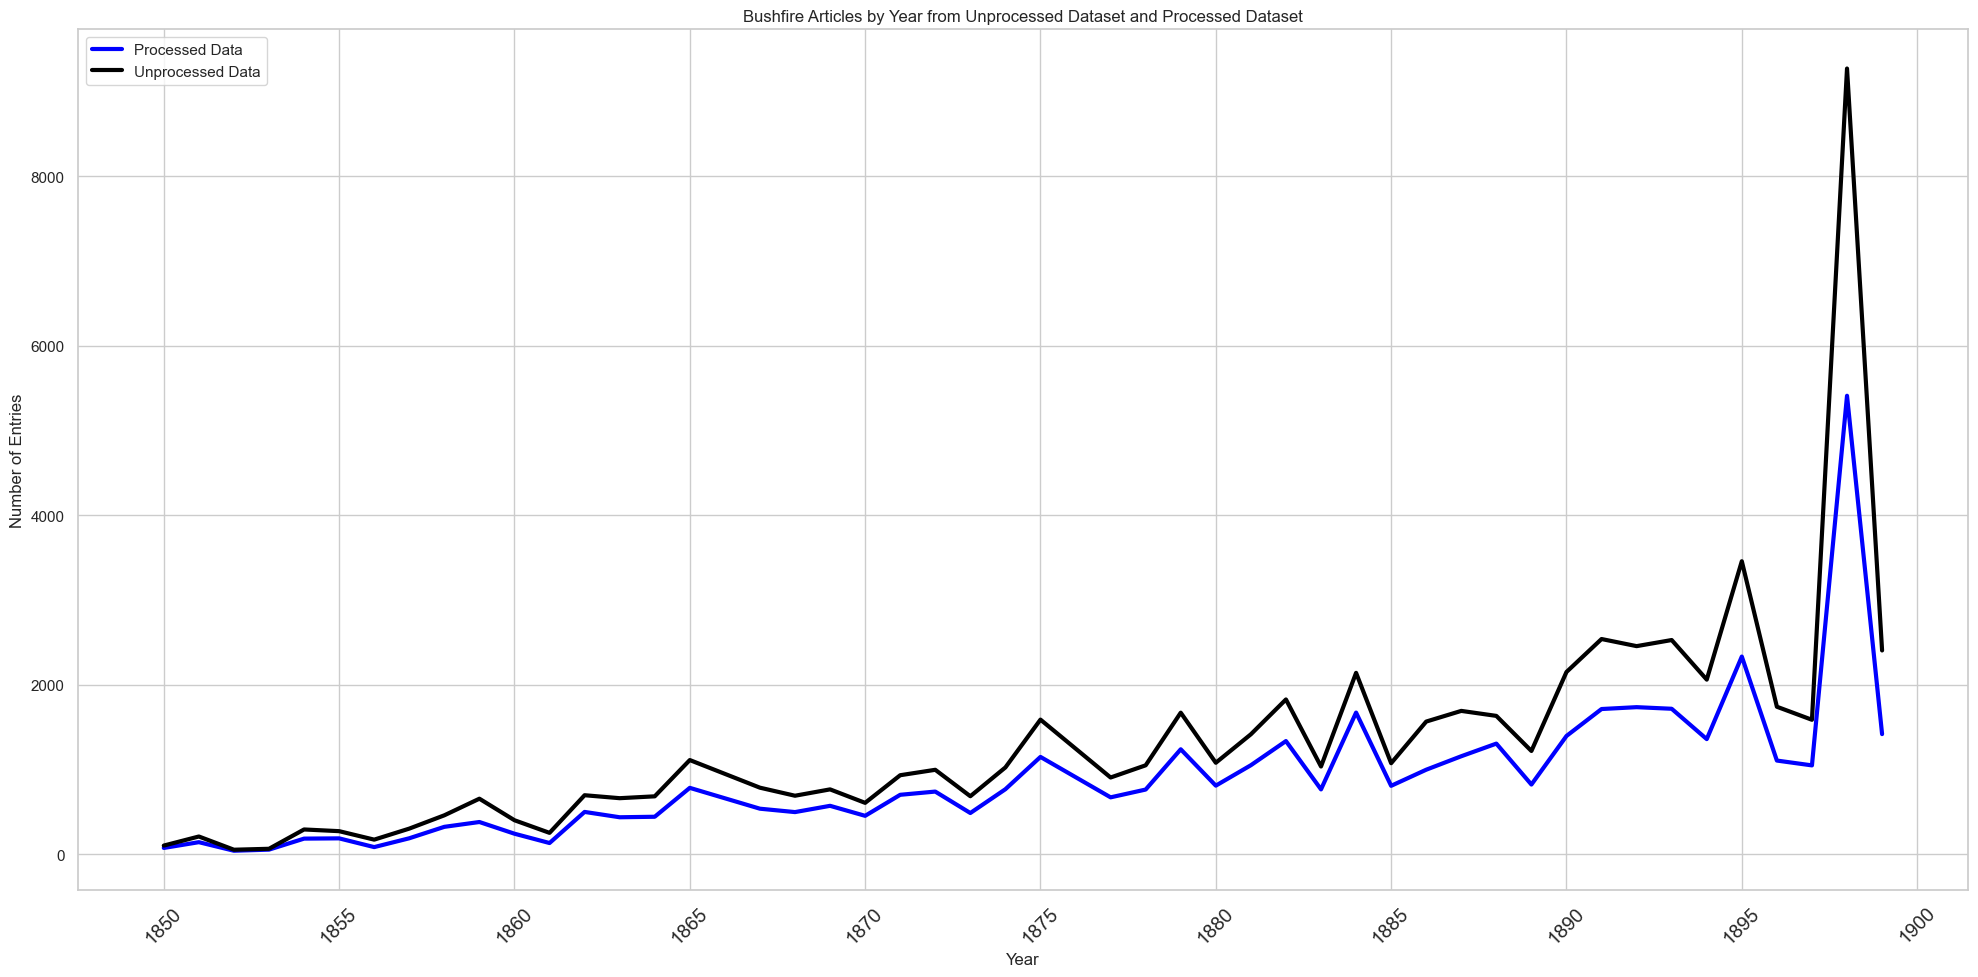

In [67]:
# Plot the yearly counts of bushfire articles as a line graph 
plt.figure(figsize=(20, 10))

# First Line
sns.lineplot(x='Year', y='Number of Entries', data=yearly_counts, color='blue', linewidth=3, label='Processed Data')

# Second Line - assuming you want to plot the same data but it's just for demonstration
sns.lineplot(x='Year', y='Number of Entries', data=yearly_counts_unprocessed, color='black', linewidth=3, label='Unprocessed Data')

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

# Add title and format x-ticks
plt.title('Bushfire Articles by Year from Unprocessed Dataset and Processed Dataset')
plt.xticks(rotation=45, fontsize=14)

# Display the legend
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


The only point where the datsets are not comparable is in the 1890s, and this is largely the product of geo-coding proces that was applied for this decade in which a dictionary mapping was used rather than the GHAP API. 

# Analysis of Words over Time





In [68]:
"""
We will use the unprocessed dataset for this analysis because it contains more articles. 
We will implement the following processes to complete theis analysis:
1. Drop duplicate entries using the 'url' column
2. Group the dataframe by year and sum the word count for each year to get the total word count for each year 
3. Calculate the average word count per article for each year
4. Calculate the median word count per article for each year
"""

# use df_bushfire_unprocessed dataframe to drop duplicate entries using the 'url' column
df_bushfire_unprocessed_word_analysis = df_bushfire_unprocessed.drop_duplicates(subset=['url'], keep='first')
# Add 'Year' column to df_bushfire_unprocessed_word_analysis dataframe
df_bushfire_unprocessed_word_analysis['Year'] = pd.DatetimeIndex(df_bushfire_unprocessed_word_analysis['date']).year
#create a new dataframe called df_bushfire_unprocessed_word_analysis_grouped which groups the df_bushfire_unprocessed_word_analysis dataframe by year and sums the word count for each year
df_bushfire_unprocessed_word_analysis_grouped = df_bushfire_unprocessed_word_analysis.groupby('Year')['words'].sum().reset_index()

# Merge with yearly_counts_unprocessed for further calculations
merged_df_unprocessed = pd.merge(df_bushfire_unprocessed_word_analysis_grouped, yearly_counts_unprocessed, on='Year', how='left')

# Step 3: Calculate the average word count per article for each year
merged_df_unprocessed['average_word_count'] = merged_df_unprocessed['words'] / merged_df_unprocessed['Number of Entries']

# Step 4: Calculate the median word count per article for each year
# Grouping the original dataframe to calculate median for each year
median_word_counts = df_bushfire_unprocessed_word_analysis.groupby('Year')['words'].median().reset_index()
merged_df_unprocessed = pd.merge(merged_df_unprocessed, median_word_counts, on='Year', how='left')
merged_df_unprocessed = merged_df_unprocessed.rename(columns={'words_x': 'total_words', 'words_y': 'median_word_count'})

# Sort the dataframe by year so it can be plotted
merged_df_unprocessed = merged_df_unprocessed.sort_values(by='Year')

#Save the dataframe to a csv file
merged_df_unprocessed.to_csv("word_analysis__over_time_unprocessed_df.csv", index=False)

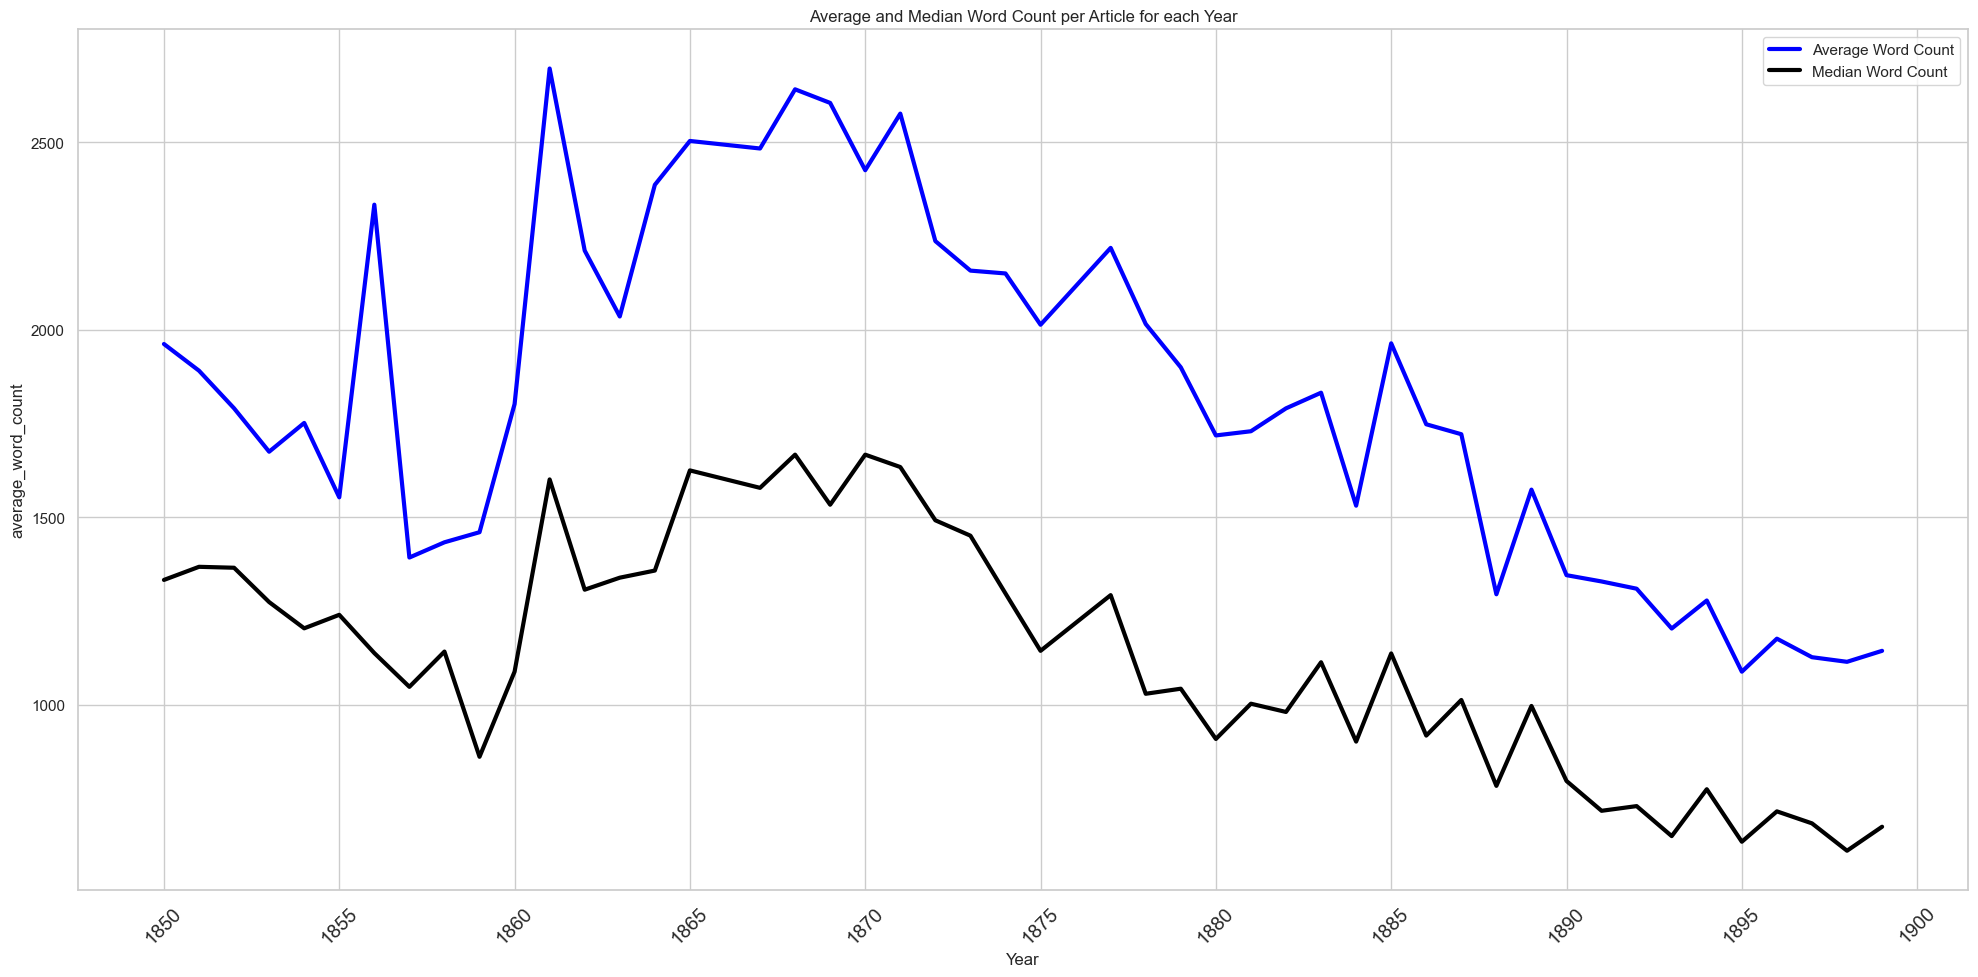

In [69]:
# Plot the average word count per article for each year as a line graph
# and the median word count per article for each year as a line graph
plt.figure(figsize=(20, 10))

# First Line - Average Word Count
sns.lineplot(x='Year', y='average_word_count', data=merged_df_unprocessed, color='blue', linewidth=3, label='Average Word Count')

# Second Line - Median Word Count
sns.lineplot(x='Year', y='median_word_count', data=merged_df_unprocessed, color='black', linewidth=3, label='Median Word Count')

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

# Add title and format x-ticks
plt.title('Average and Median Word Count per Article for each Year')
plt.xticks(rotation=45, fontsize=14)

# Display the legend
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


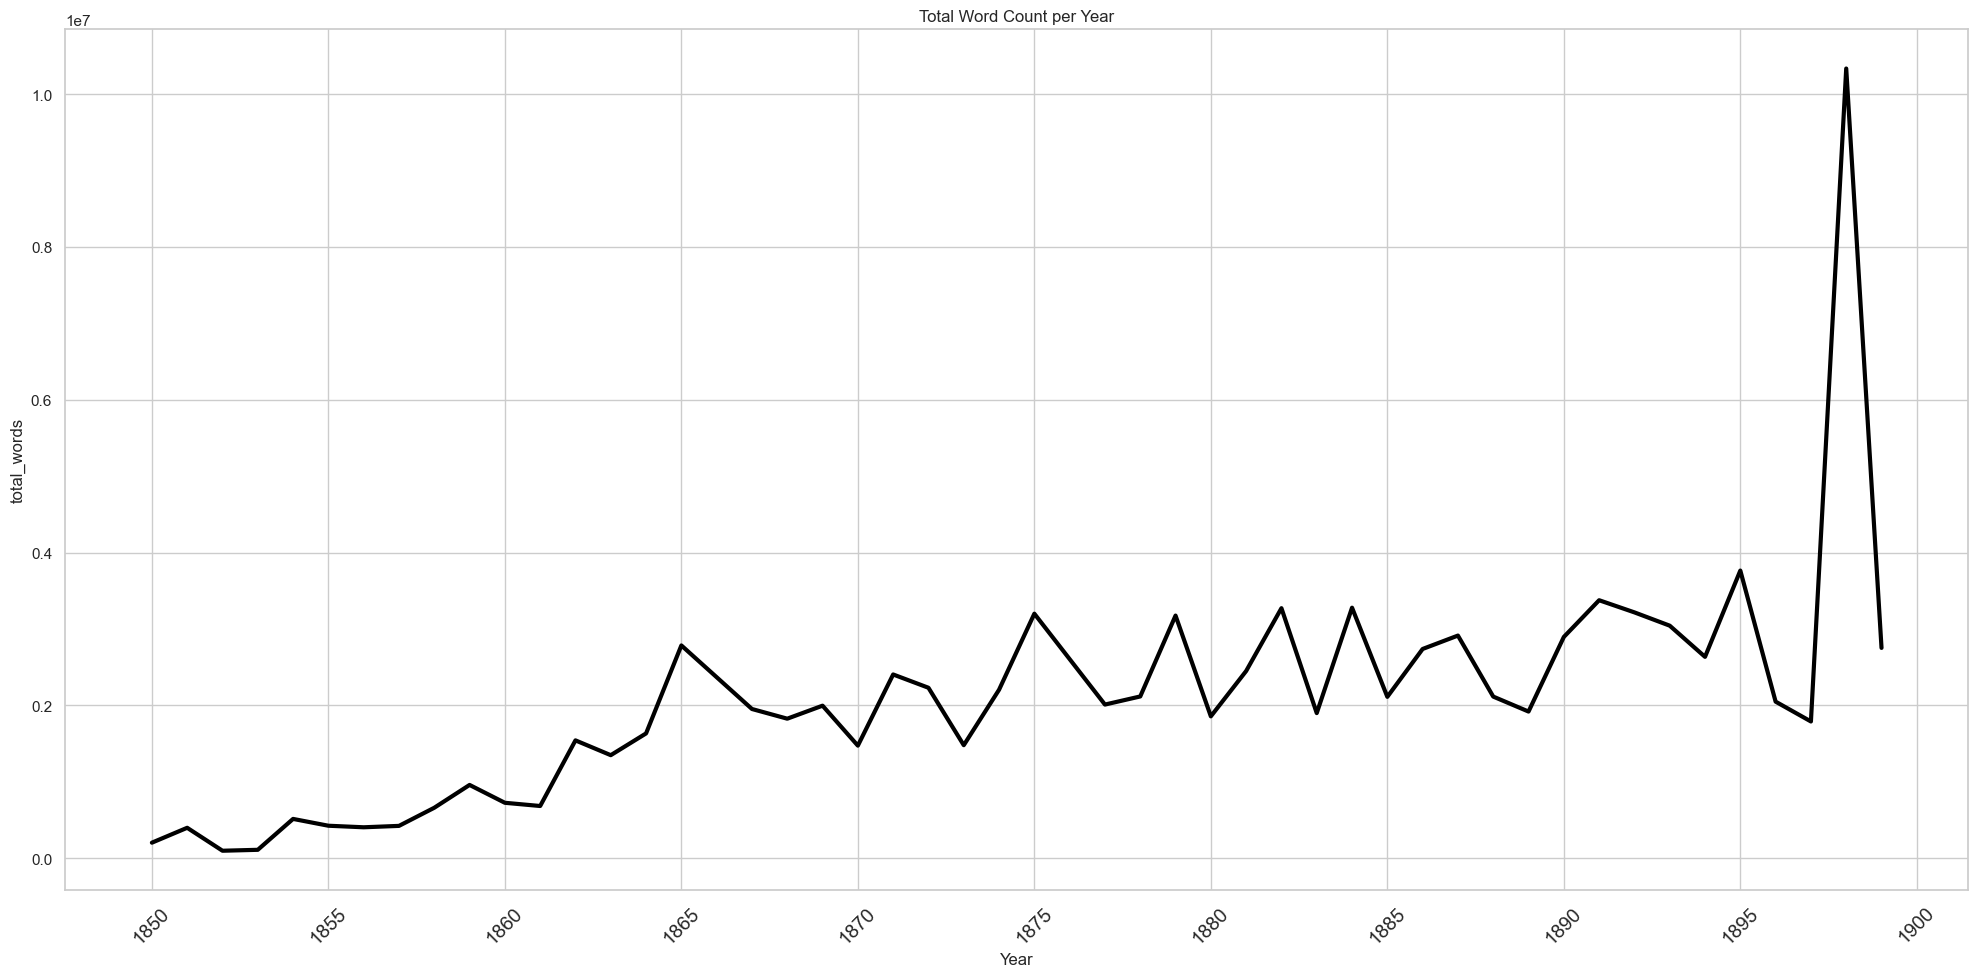

In [70]:
#PLot the total_word_count per year as a line graph
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='total_words', data=merged_df_unprocessed, color='black', linewidth=3)

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title('Total Word Count per Year')
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()


We are picking up every genre of article, so we will need to filter out the articles that are not news articles. We will do this by filtering out articles that do not contain the word 'fire' (case insensitive) in the title, then we will rechart the average and median.


In [71]:
# create new df called df_bushfire_unprocessed_word_analysis_grouped_yearly which groups the df_bushfire_unprocessed_word_analysis_fire_title that
# drops any entry that does not contain the word 'fire' in the title

# Drop any entry that has a nan in the title column
df_bushfire_unprocessed_word_analysis_fire_title = df_bushfire_unprocessed_word_analysis.dropna(subset=['title'])

# Filter the dataframe to keep only those rows where the title contains the word 'fire'
df_bushfire_unprocessed_word_analysis_fire_title = df_bushfire_unprocessed_word_analysis_fire_title[df_bushfire_unprocessed_word_analysis_fire_title['title'].str.contains('fire', case=False, na=False)]


# Print the number of entries in df_bushfire_unprocessed_word_analysis_fire_title
print("The number of entries in df_bushfire_unprocessed_word_analysis_fire_title: " + str(len(df_bushfire_unprocessed_word_analysis_fire_title)))

# Save this dataframe to a csv file for visualisation for Conversation Article
df_bushfire_unprocessed_word_analysis_fire_title.to_csv("bushfire_unprocessed_fire_title.csv", index=False)


The number of entries in df_bushfire_unprocessed_word_analysis_fire_title: 9387


We have now reduced the datset from 62988 articles to 9387 articles that contain 'fire' in the title. It should be noted this will not pick up articles that have nomenclature of disaster such as 'Black Monday' 

In [72]:
# Assuming df_bushfire_unprocessed_word_analysis_fire_title is your initial dataframe

# Drop duplicate entries using the 'url' column
df_bushfire_unprocessed_word_analysis_fire_title = df_bushfire_unprocessed_word_analysis_fire_title.drop_duplicates(subset=['url'])

# Add 'Year' column (ensure this matches the actual column name in your dataframe)
df_bushfire_unprocessed_word_analysis_fire_title['Year'] = pd.DatetimeIndex(df_bushfire_unprocessed_word_analysis_fire_title['date']).year

# Group the dataframe by year and sum the word count for each year
df_grouped_fire_title = df_bushfire_unprocessed_word_analysis_fire_title.groupby('Year').agg(total_words=('words', 'sum'), 
                                                                                 Number_of_Entries=('words', 'count'), 
                                                                                 median_word_count=('words', 'median')).reset_index()

# Calculate the average word count per article for each year
df_grouped_fire_title['average_word_count'] = df_grouped_fire_title['total_words'] / df_grouped_fire_title['Number_of_Entries']

# df_grouped_fire_title now contains Year, total_words, Number_of_Entries, median_word_count, average_word_count


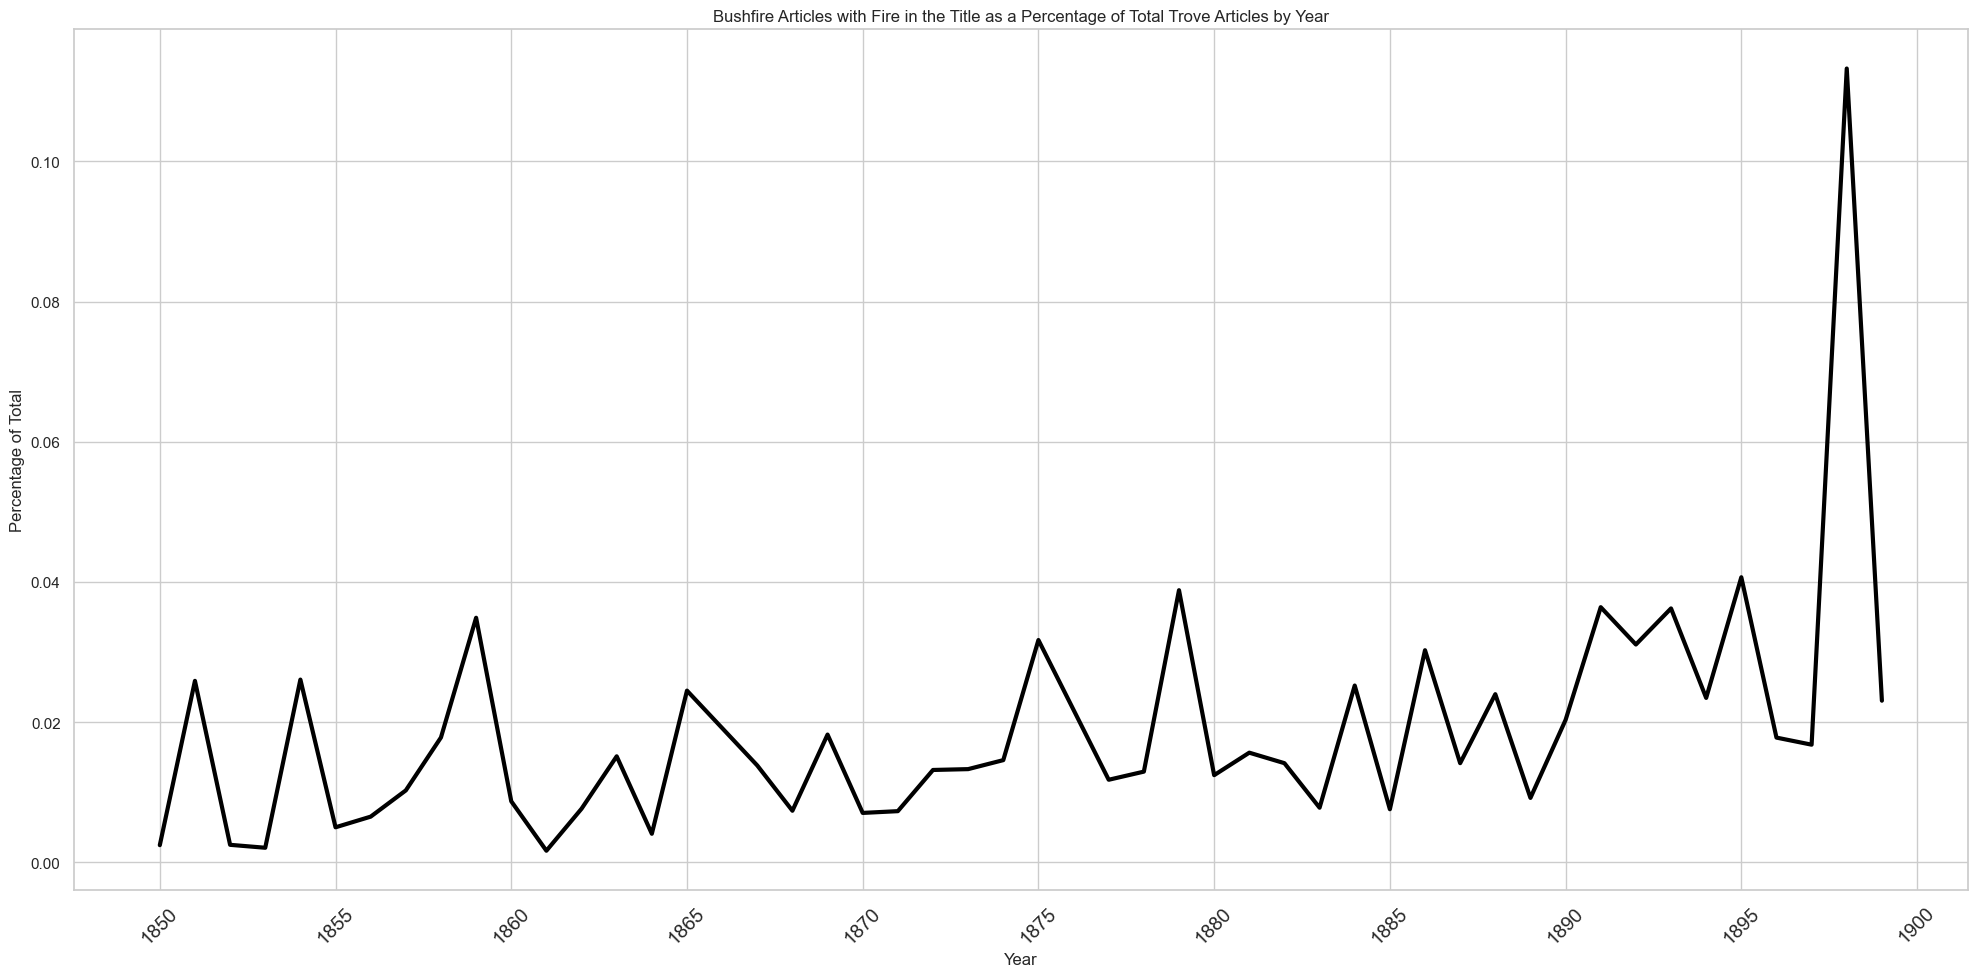

In [73]:
#plot fire title df_grouped_fire_title['Number_of_Entries'] / total_trove['total'] as a line graph


# Create a new DataFrame for percentages
df_grouped_fire_title_percentages = pd.DataFrame(columns=['Year', 'Percentage of Total'])

# Correcting the appending process
for index, row in df_grouped_fire_title.iterrows():
    year = row['Year']
    number_of_entries = row['Number_of_Entries']
    
    # Check if the year exists in total_trove DataFrame
    if year in total_trove['year'].values:
        total = total_trove.loc[total_trove['year'] == year]['total'].iloc[0]
        percentage = (number_of_entries / total) * 100
        # Use {} instead of ()
        df_grouped_fire_title_percentages = df_grouped_fire_title_percentages.append({'Year': year, 'Percentage of Total': percentage}, ignore_index=True)

# Plotting the data as a line graph
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='Percentage of Total', data=df_grouped_fire_title_percentages, color='black', linewidth=3)

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title('Bushfire Articles with Fire in the Title as a Percentage of Total Trove Articles by Year')
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()



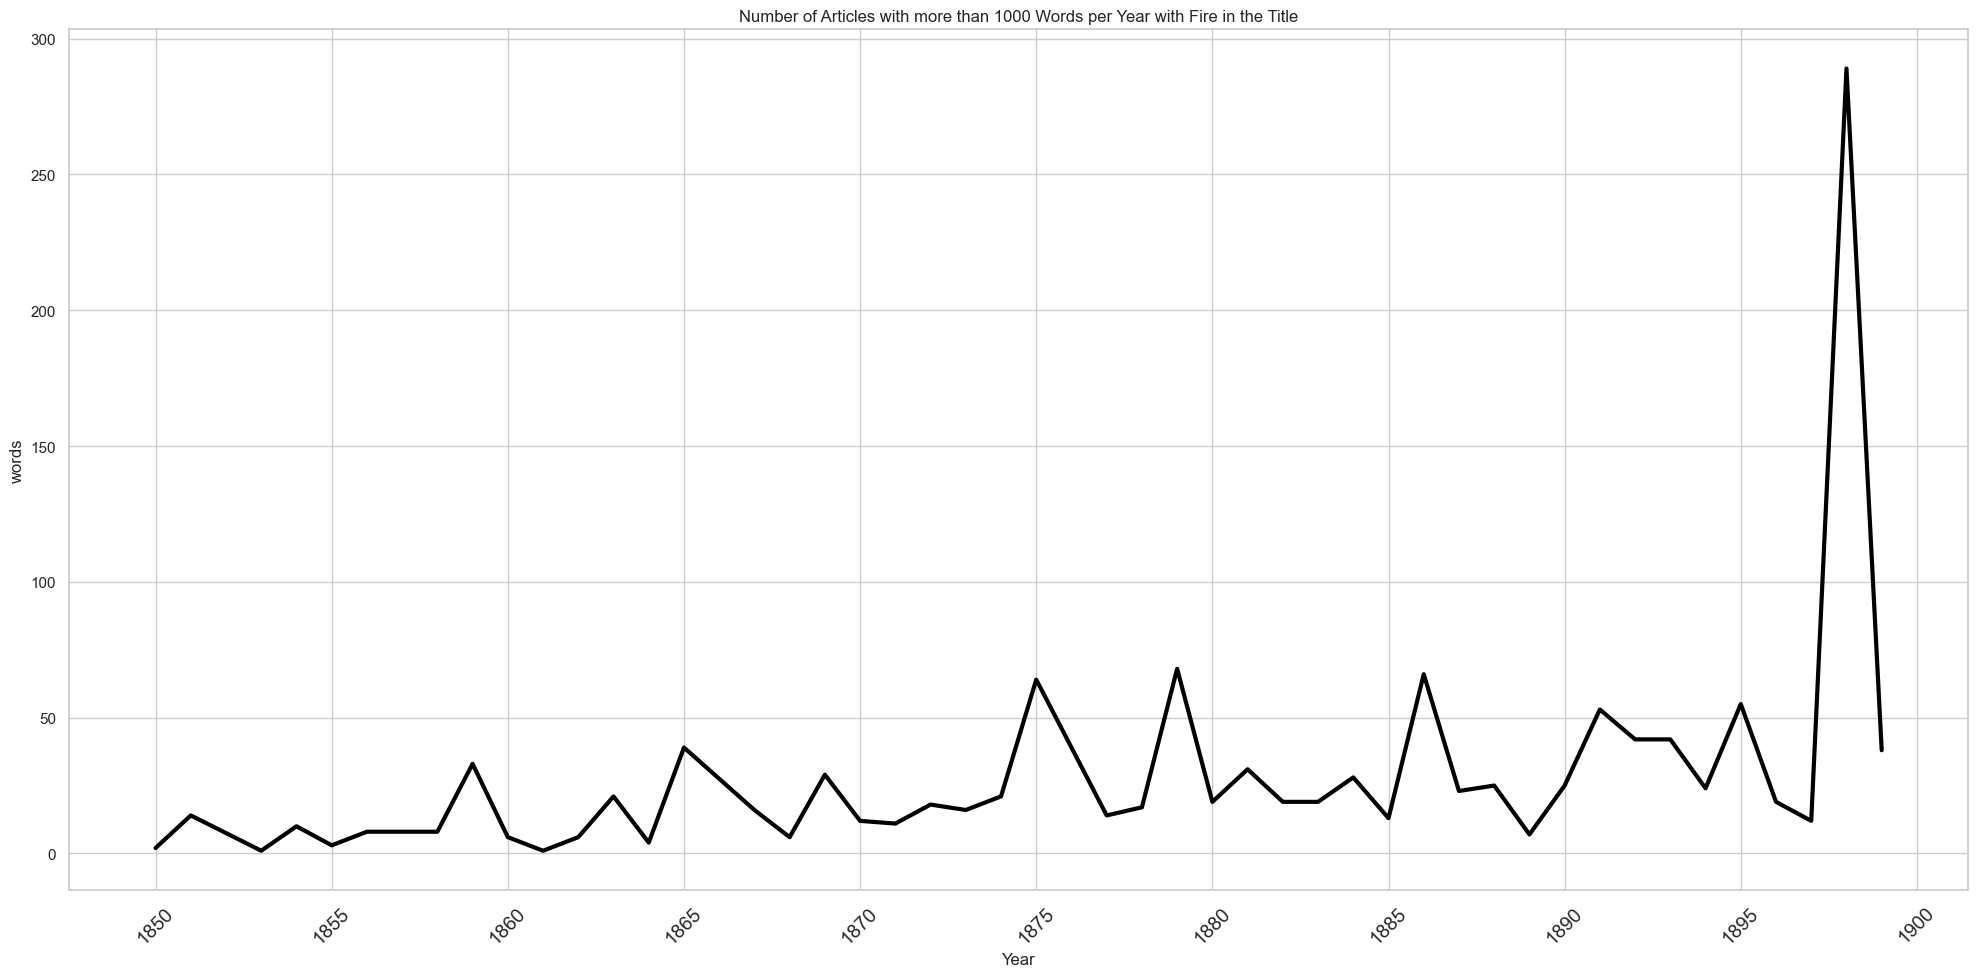

In [74]:
#Now I will plot the number of articles that are greater than 1000 words per year as a line graph
# Filter the dataframe to keep only those rows where the word count is greater than 1000
df_bushfire_unprocessed_word_analysis_fire_title_1000_words = df_bushfire_unprocessed_word_analysis_fire_title[df_bushfire_unprocessed_word_analysis_fire_title['words'] > 1000]

# Group the dataframe by year and count the number of entries for each year
df_bushfire_unprocessed_word_analysis_fire_title_1000_words_grouped = df_bushfire_unprocessed_word_analysis_fire_title_1000_words.groupby('Year')['words'].count().reset_index()

# Plot the data as a line graph
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='words', data=df_bushfire_unprocessed_word_analysis_fire_title_1000_words_grouped, color='black', linewidth=3)

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title('Number of Articles with more than 1000 Words per Year with Fire in the Title')
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()



# Average and Median Word Count for Article with Fire in the Title

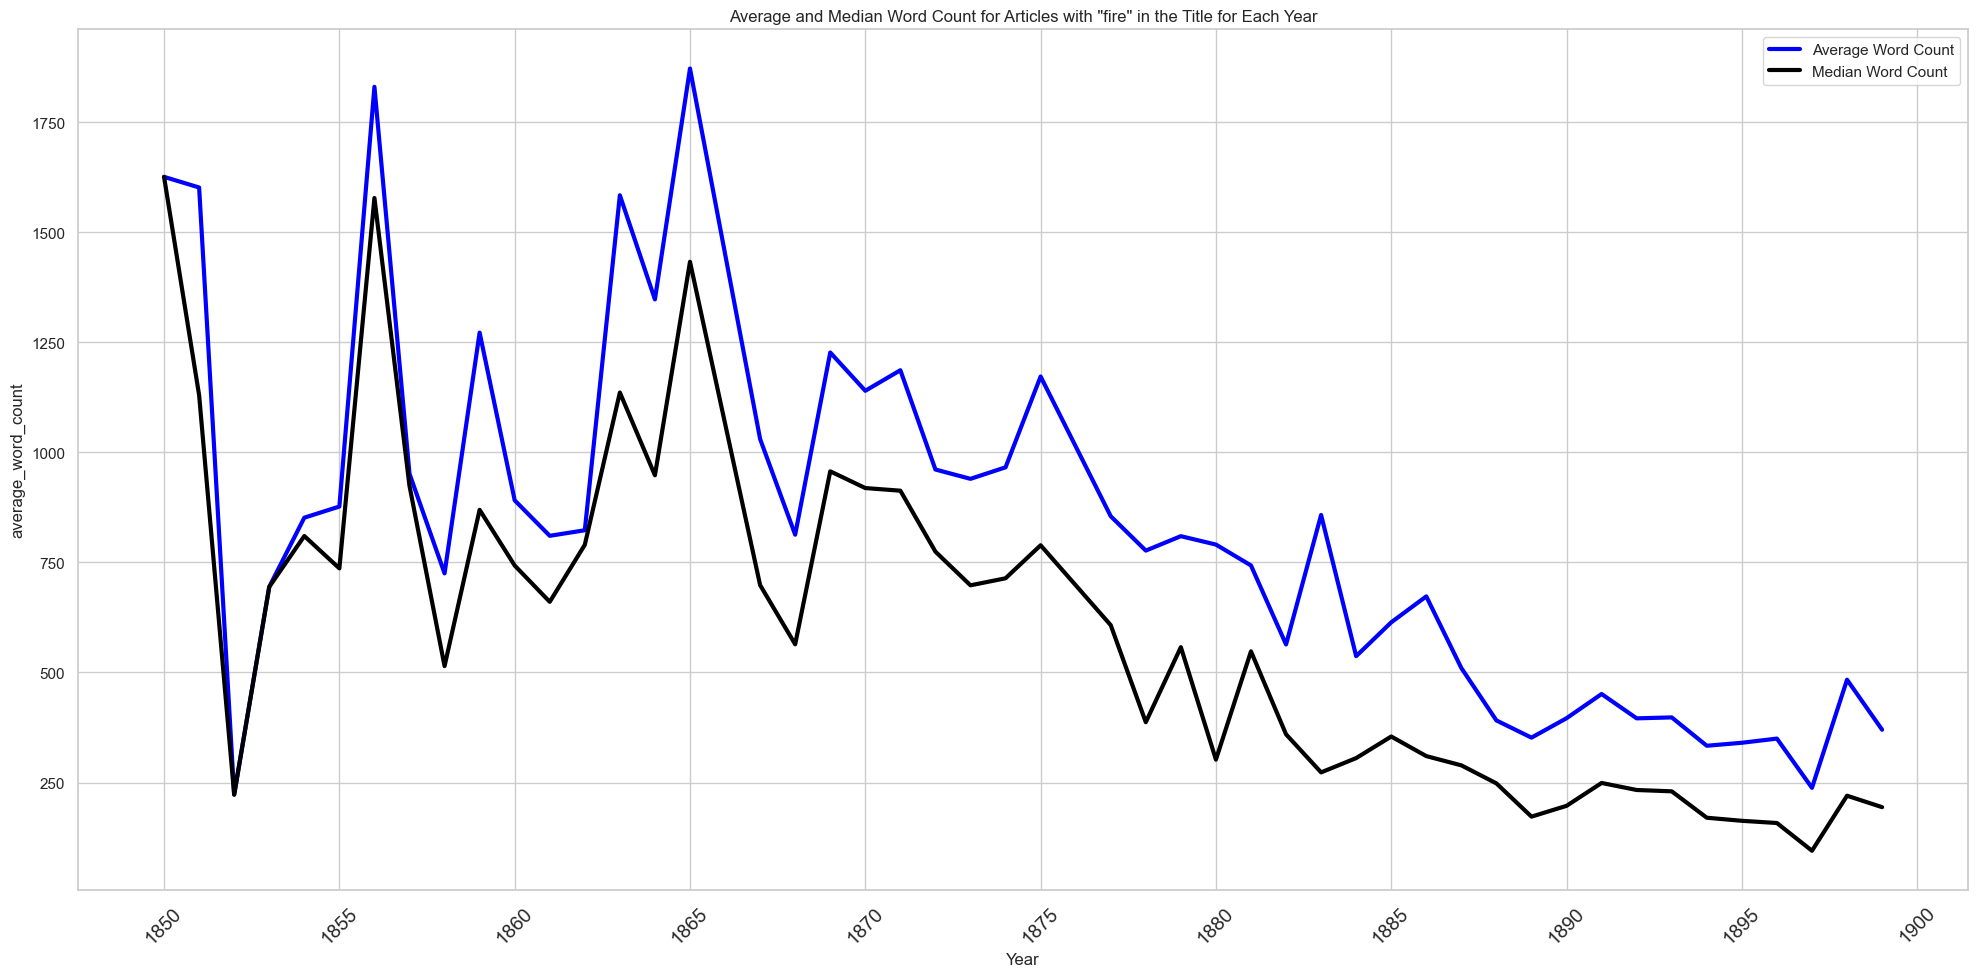

In [75]:
#plot df_grouped_fire_title as a line graph include average_word_count and median_word_count
plt.figure(figsize=(20, 10))

# First Line - Average Word Count
sns.lineplot(x='Year', y='average_word_count', data=df_grouped_fire_title, color='blue', linewidth=3, label='Average Word Count')

# Second Line - Median Word Count
sns.lineplot(x='Year', y='median_word_count', data=df_grouped_fire_title, color='black', linewidth=3, label='Median Word Count')

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

# Add title and format x-ticks
plt.title('Average and Median Word Count for Articles with "fire" in the Title for Each Year')
plt.xticks(rotation=45, fontsize=14)

# Display the legend
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()

plt.show()


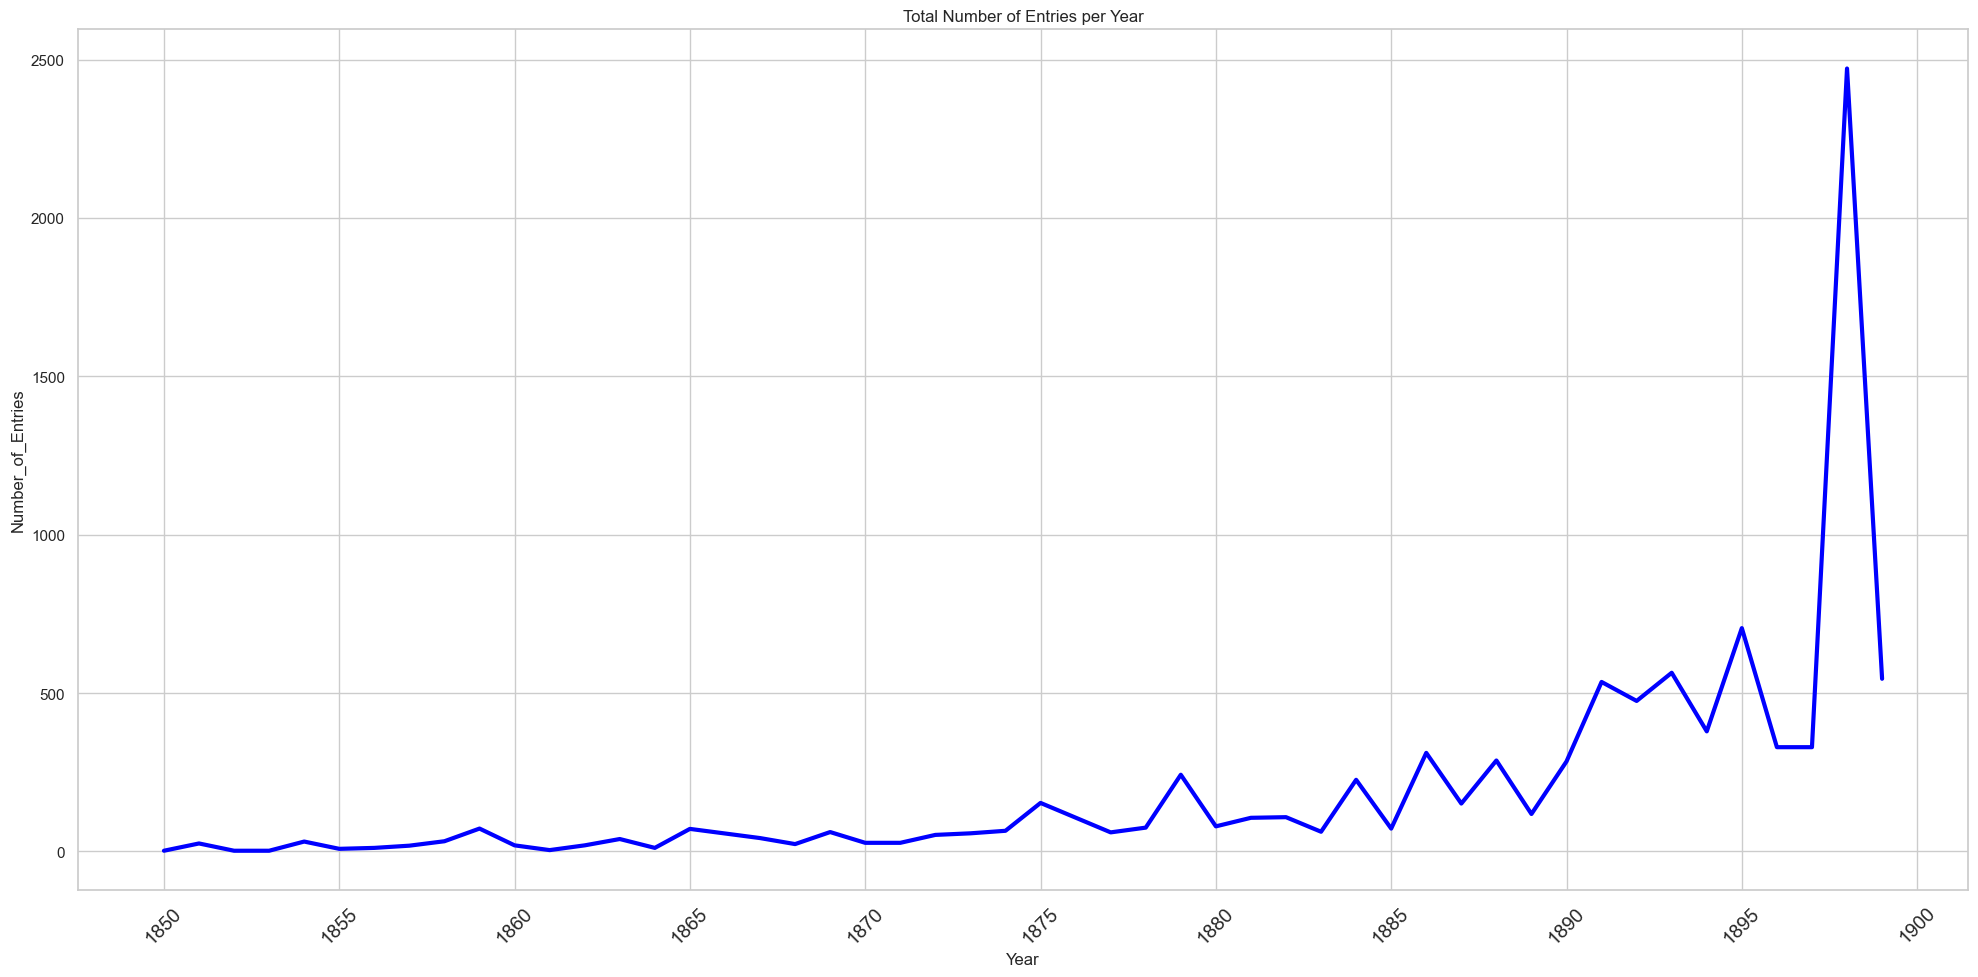

In [76]:
#Plot total number of entries per year as a line graph
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='Number_of_Entries', data=df_grouped_fire_title, color='blue', linewidth=3)

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title('Total Number of Entries per Year')
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()



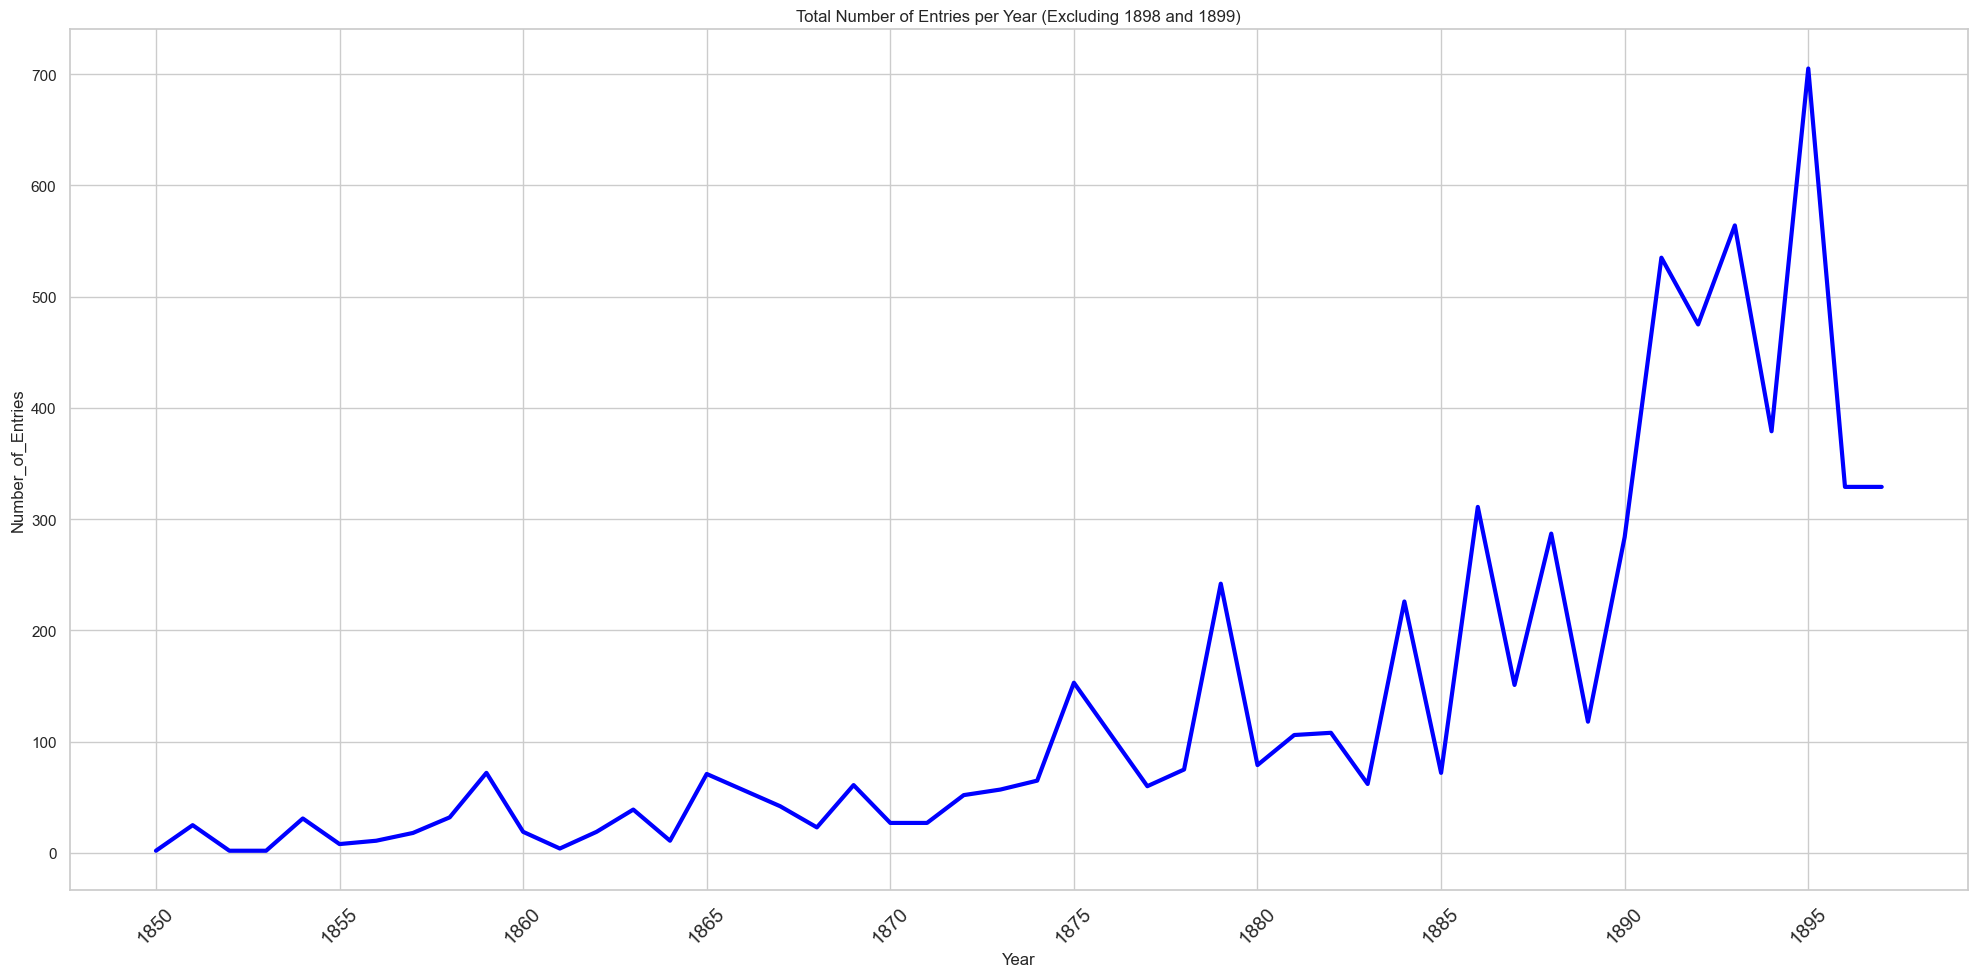

In [77]:
# Filter out the years 1898 and 1899
df_filtered = df_grouped_fire_title[df_grouped_fire_title['Year'].isin([1898, 1899]) == False]

# Plotting the data as a line graph
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='Number_of_Entries', data=df_filtered, color='blue', linewidth=3)

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title('Total Number of Entries per Year (Excluding 1898 and 1899)')
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()

# Topics Pre-Generated for the Bushfire Dataset

This contains the topic output modelled on the text (body) of the newspaper articles from the unprocessed dataset.

## Text 

# Analysis and Explanation of Topics

The topic modelling was conducted on the 'unprocessed' dataset consisting of 62988 articles. The topic scores and attached metadata are stored in the file 'doc_topics_df_metadata.csv'. The topic modelling was conducted using Gensim's LDA model. The number of topics was set to 10 with 15 words for each topic. 

The topics are as follows:

Topic 0: steamer port coast bay arrived sydney hobart captain bush left fires island cape vessel yesterday

Topic 1: sheep stock charge station cattle wagga owner fat owners week grass bullocks fires bush store

Topic 2: tho aro bo havo tlio ho firo largo nnd tbo iu thc aud wero boon

Topic 3: named bush man sydney last yesterday fire died saturday two near death new found night

Topic 4: new fires south bush per adelaide government australia port year colony bill zealand victoria melbourne

Topic 5: court police act fire case fined charged bush john evidence costs guilty fires defendant said

Topic 6: fire bush fires destroyed grass raging miles burnt damage fencing large district burning acres several

Topic 7: one bush would time fire mr two last road may us place could creek good

Topic 8: meeting held council mr bush fires public committee evening next district last relief board school

Topic 9: weather rain fires bush hot heat last district shade day dry water grass heavy country

The topics of interest are topics 3, 5, 6, 8, 9. These topics can be summarised as follows:
- topic 3: death, fire, bush
- topic 5: potentially arson, and legal proceedings
- topic 6: reporting on extent of damage and loss
- topic 8: community response and relief
- topic 9: weather conditions

Some examples of articles from topic 3 are as follows:
- [A CHILD BURNT TO DEATH IN QUEENSLAND. (1895)](https://nla.gov.au/nla.news-article238539976) 
- [INTERCOLONIAL. (FROM OUR OWN CORRESPONDENTS.) NEW SOUTH WALES. SYDNEY, December 29. (1890)](https://nla.gov.au/nla.news-article3510230)
These articles are reporting on death. There is a notable spike in 1884.

Some examples of articles from topic 5 are as follows:
- [BREACH OF BUSH FIRES ACT. Mount Gambier, February 25.(1879)](https://nla.gov.au/nla.news-article42975303)
- [MAGISTRATES' COURTS. CLARE: WEDNESDAY, MARCH 19. [Before Messrs. A. Palmer and A. Young, J.P.'s.]](1879)(https://nla.gov.au/nla.news-article160119263)
There is a notable decrease in this topic from 1867 onwards, however, it should be noted that the topic is much smaller than the other topics.

Some examples of articles from topic 6 are as follows:
- [The Mountain Fires. STILL RAGING.](1895)(https://nla.gov.au/nla.news-article62739141)
- [FIRES IN THE COUNTRY. FURTHER DAMAGE TO PROPERTY. [BY TELEGRAPH.] (FROM OUR CORRESPONDENTS.) ARMIDALE, Thursday.](1895)(https://nla.gov.au/nla.news-article14015640)
This topic is stable and significant and there is a spike 1891 and 1892.

Some examples of articles from topic 8 are as follows:
- [RELIEF FUNDS. SUBSCRIPTIONS INVITED.(1898)](https://nla.gov.au/nla.news-article39654368)
- [KONDOPARINGA, FEBRUARY 26.(1859)](https://nla.gov.au/nla.news-article49899464)
Spikes in 1859 and 1886.

Some examples of articles from topic 9 are as follows:
- [THE WEATHER IN THE COUNTRY. [BY TELEGRAPH.] (FROM OUR OWN CORRESPONDENTS.) BEGA, SATURDAY.(1887)](https://nla.gov.au/nla.news-article13625571)
- [THE DROUGHT AND ITS EFFECTS. SERIOUS BUSH FIRES IN VICTORIA AND OTHER COLONIES. (BY TELEGRAPH FROM OUR CORRESPONDENTS.) MOOROOPNA, SATURDAY.(1888)](https://nla.gov.au/nla.news-article6910375)
Peaks in 1871/72?, 1887, 1896-

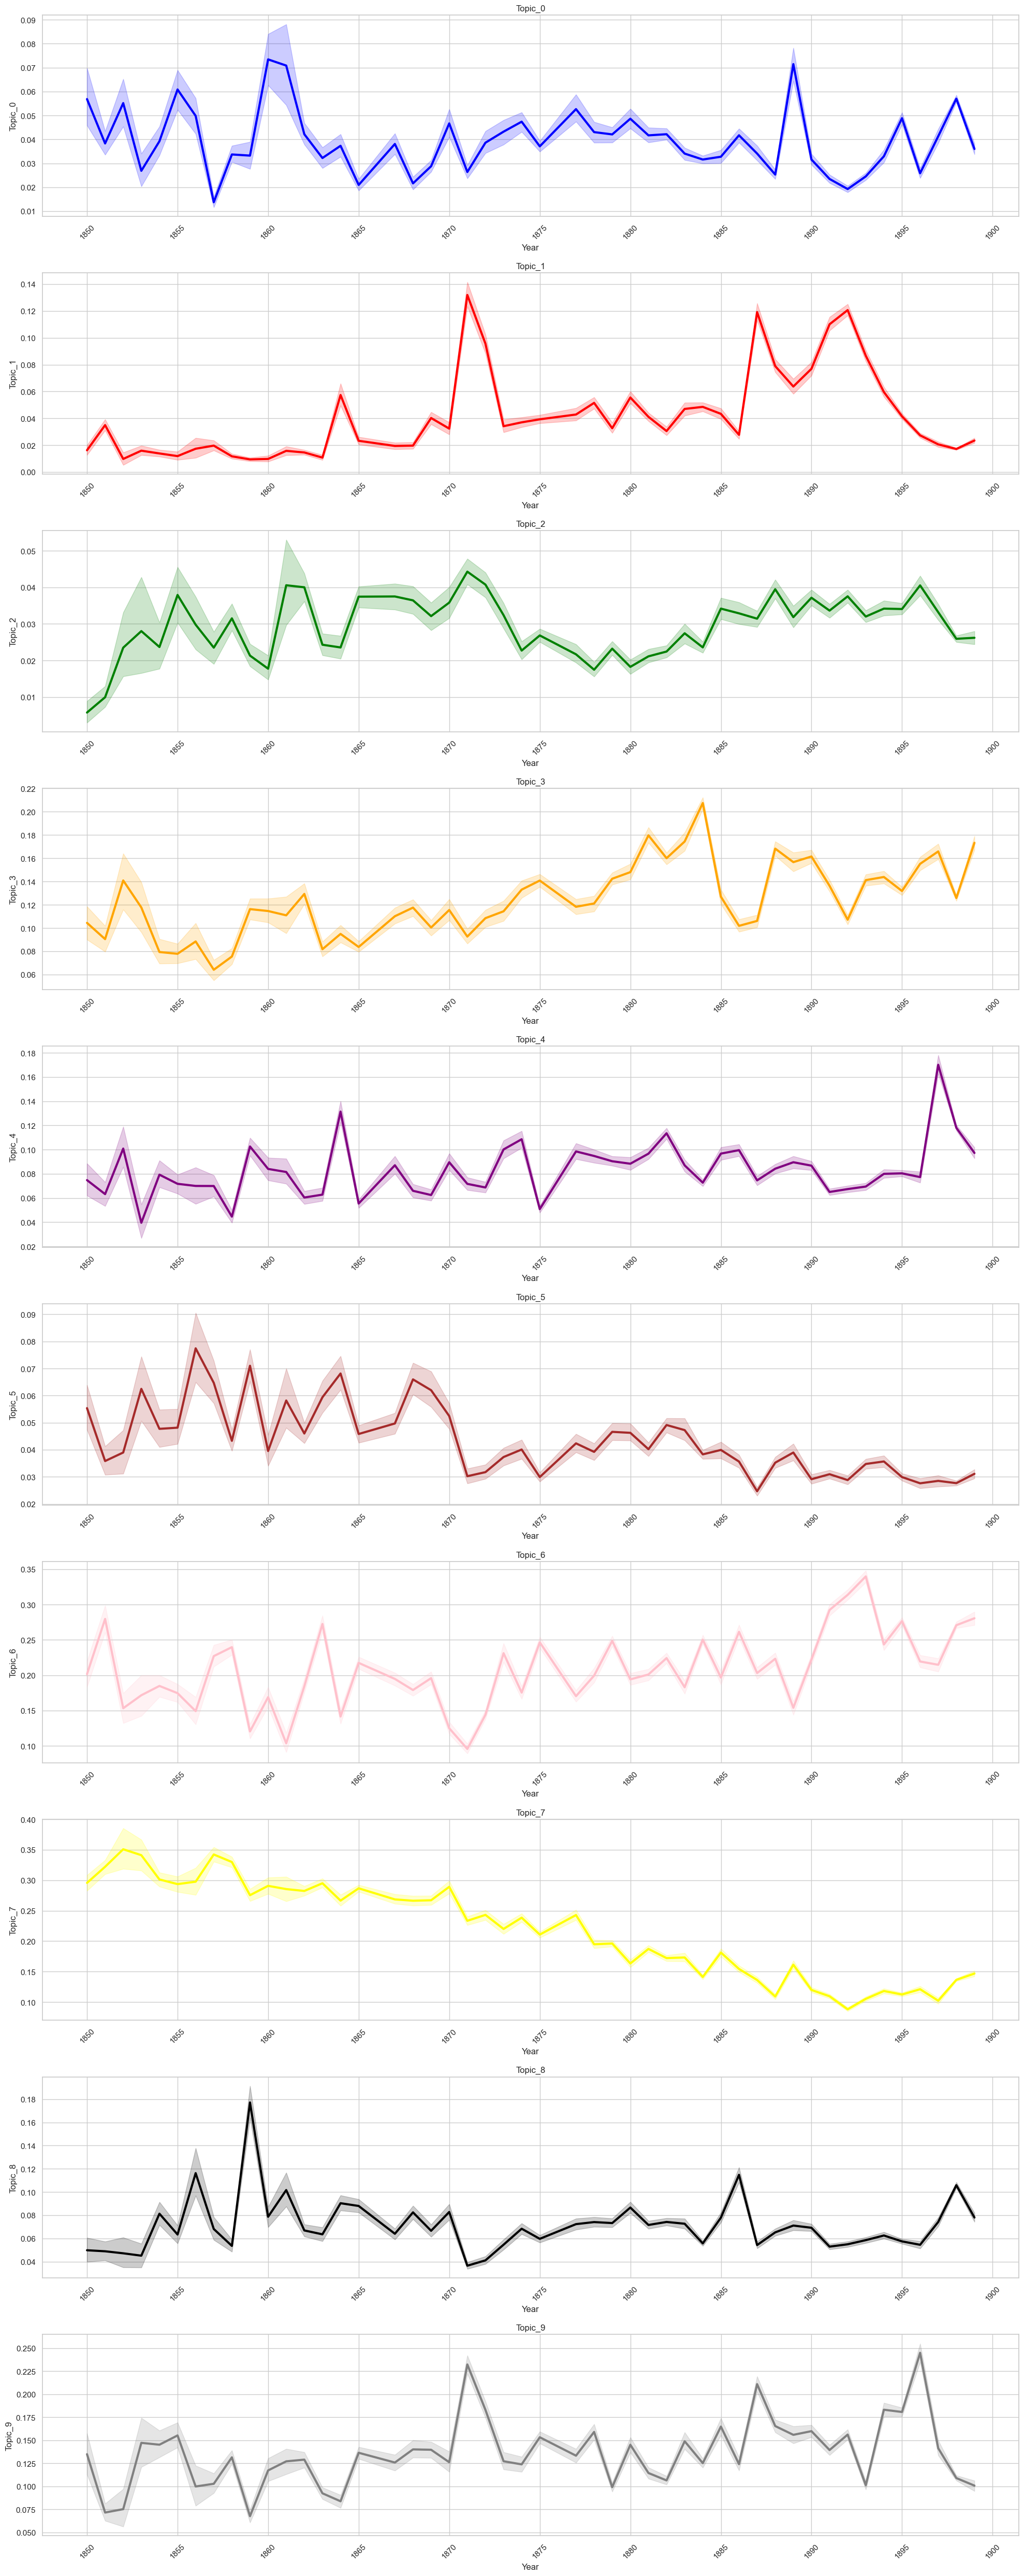

In [78]:
#load in dataframe 'doc_topics_df_metadata_text.csv
doc_topics_df_metadata = pd.read_csv('doc_topics_df_metadata_text.csv')

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(20, 50))

# List of topics
topics = ['Topic_' + str(i) for i in range(10)]

# Colors for each line
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'yellow', 'black', 'grey']

# Plot each topic in its own subplot
for i, topic in enumerate(topics):
    sns.lineplot(ax=axes[i], x='Year', y=topic, data=doc_topics_df_metadata, color=colors[i], linewidth=3)
    axes[i].set_title(topic)
    axes[i].xaxis.set_major_locator(ticker.MultipleLocator(5))
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


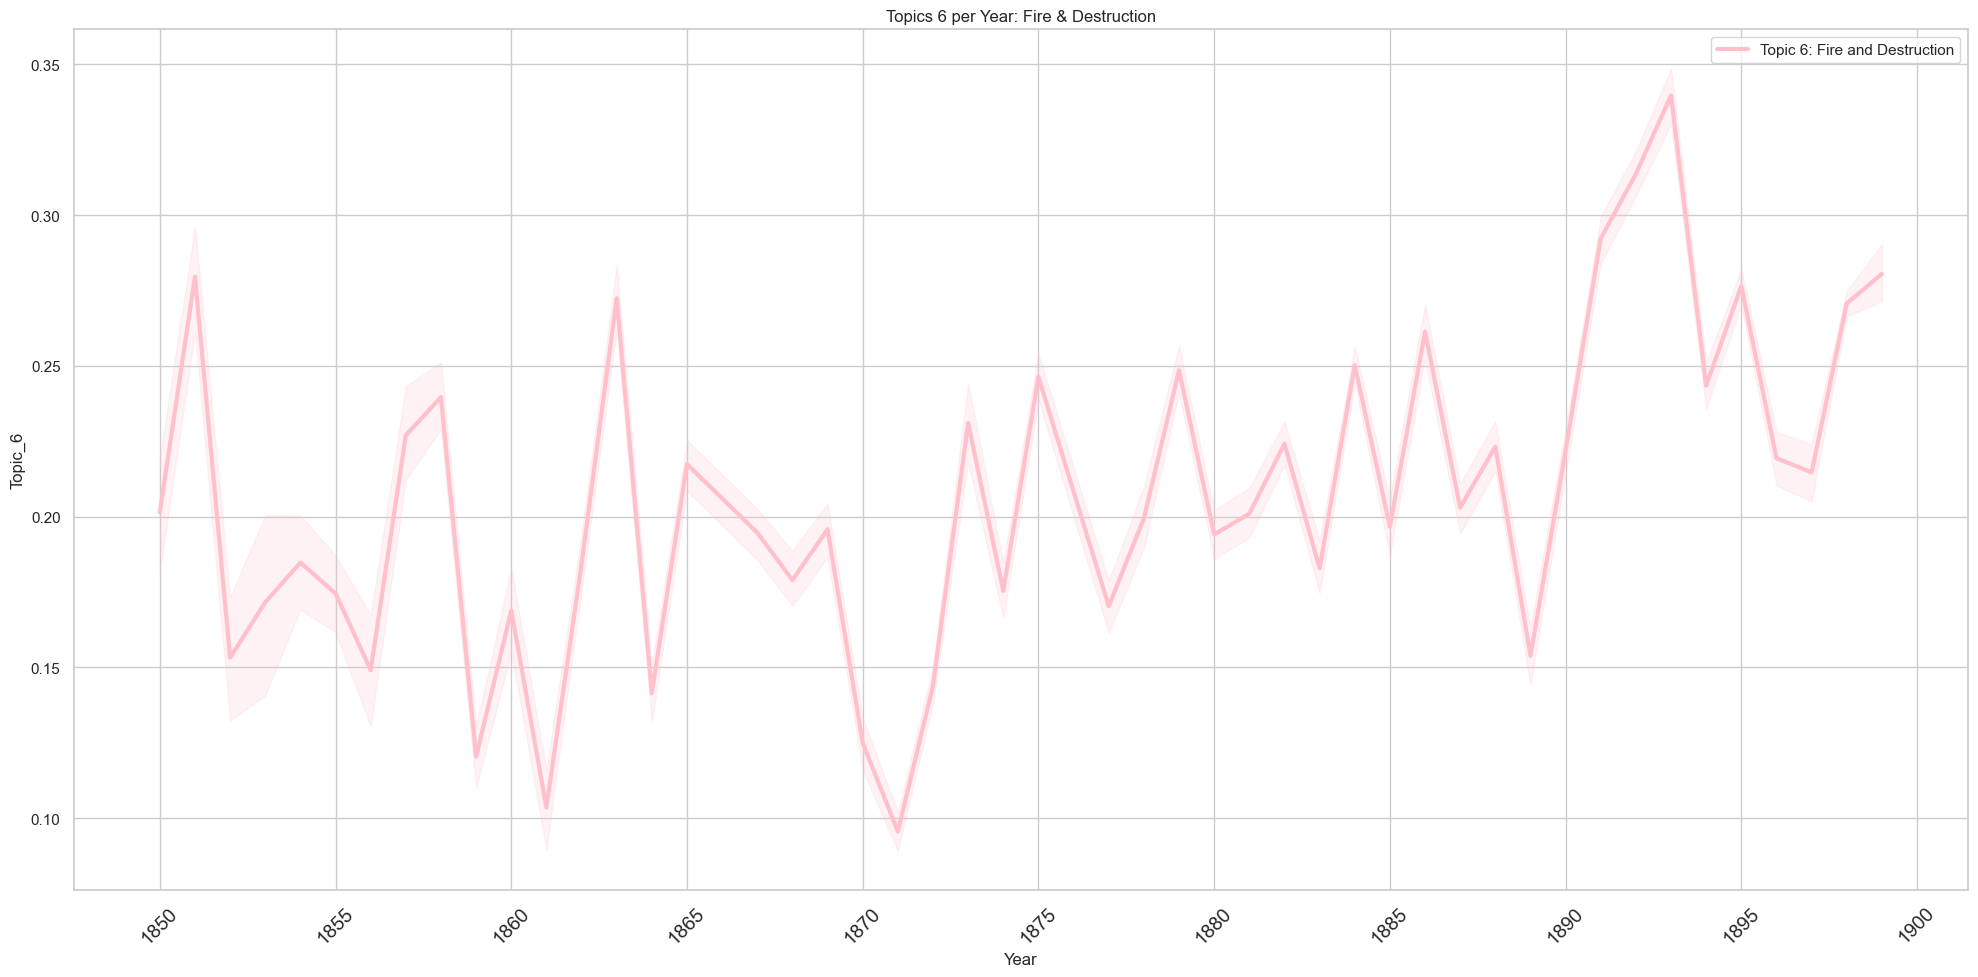

In [79]:
#plot all topics per year as a line graph 
plt.figure(figsize=(20, 10))

#sns.lineplot(x='Year', y='Topic_3', data=doc_topics_df_metadata, color='orange', linewidth=3, label='Topic 3: Death')
sns.lineplot(x='Year', y='Topic_6', data=doc_topics_df_metadata, color='pink', linewidth=3, label='Topic 6: Fire and Destruction')
#sns.lineplot(x='Year', y='Topic_9', data=doc_topics_df_metadata, color='blue', linewidth=3, label='Topic 9: Weather and Climate')

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title('Topics 6 per Year: Fire & Destruction')
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()



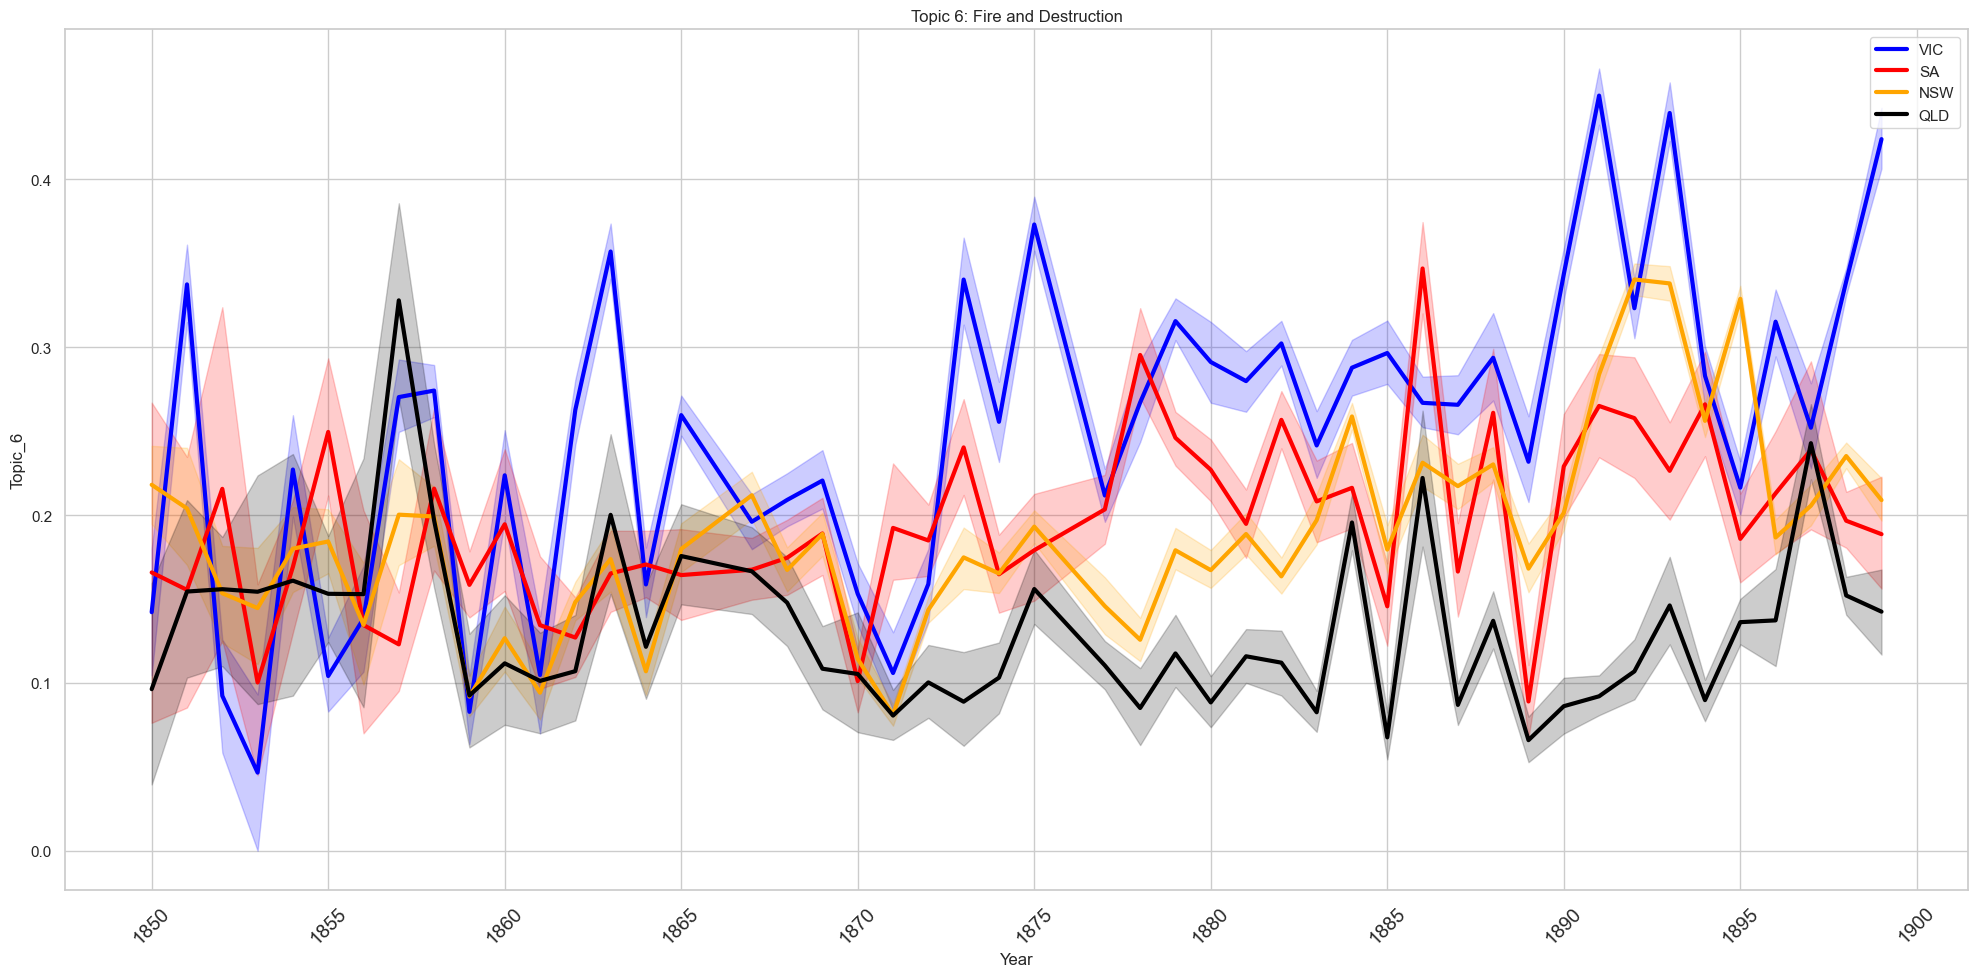

In [80]:
#Plot Topic_6 per year as a line graph and create a different line for each entry in 'State' column: VIC, NSW, QLD, SA, TAS, WA, NT, ACT,
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='Topic_6', data=doc_topics_df_metadata[doc_topics_df_metadata['State'] == 'VIC'], color='blue', linewidth=3, label='VIC')
sns.lineplot(x='Year', y='Topic_6', data=doc_topics_df_metadata[doc_topics_df_metadata['State'] == 'SA'], color='red', linewidth=3, label='SA')
sns.lineplot(x='Year', y='Topic_6', data=doc_topics_df_metadata[doc_topics_df_metadata['State'] == 'NSW'], color='orange', linewidth=3, label='NSW')
sns.lineplot(x='Year', y='Topic_6', data=doc_topics_df_metadata[doc_topics_df_metadata['State'] == 'QLD'], color='black', linewidth=3, label='QLD')

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title('Topic 6: Fire and Destruction')
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()

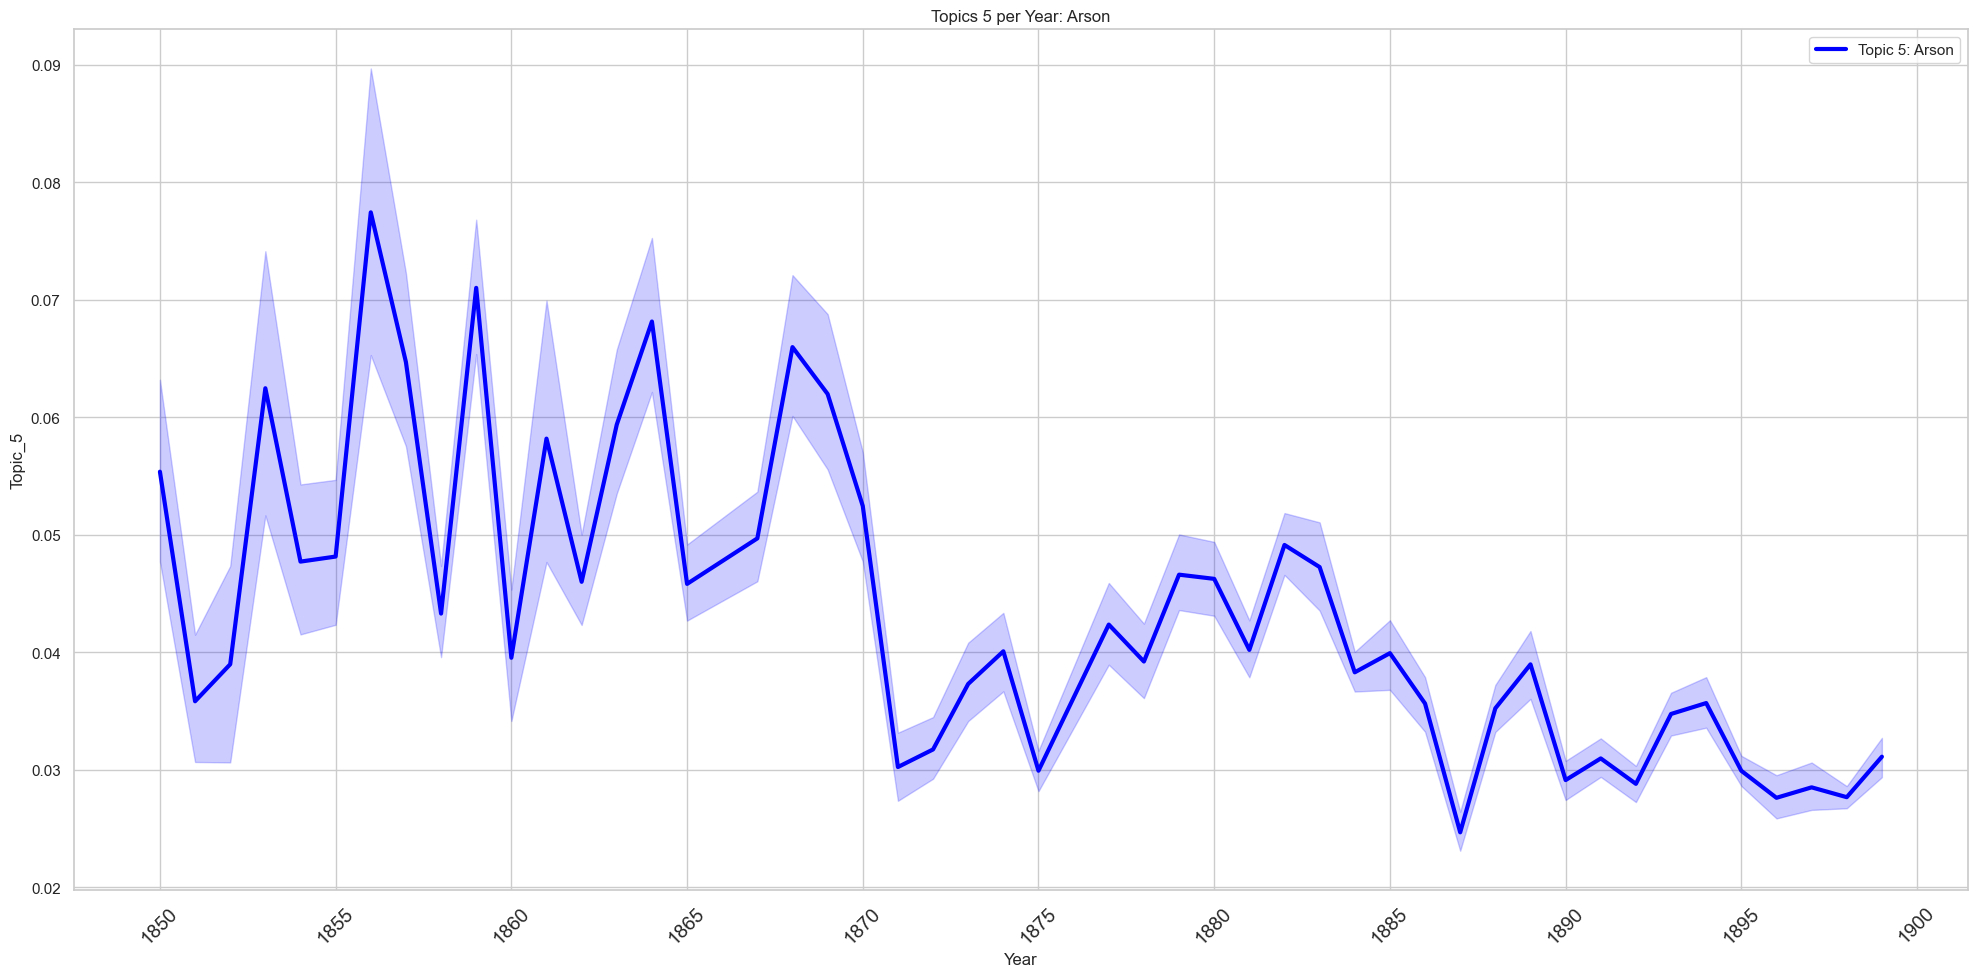

In [81]:
#plot all topics per year as a line graph 
plt.figure(figsize=(20, 10))

sns.lineplot(x='Year', y='Topic_5', data=doc_topics_df_metadata, color='blue', linewidth=3, label='Topic 5: Arson')

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title('Topics 5 per Year: Arson')
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()



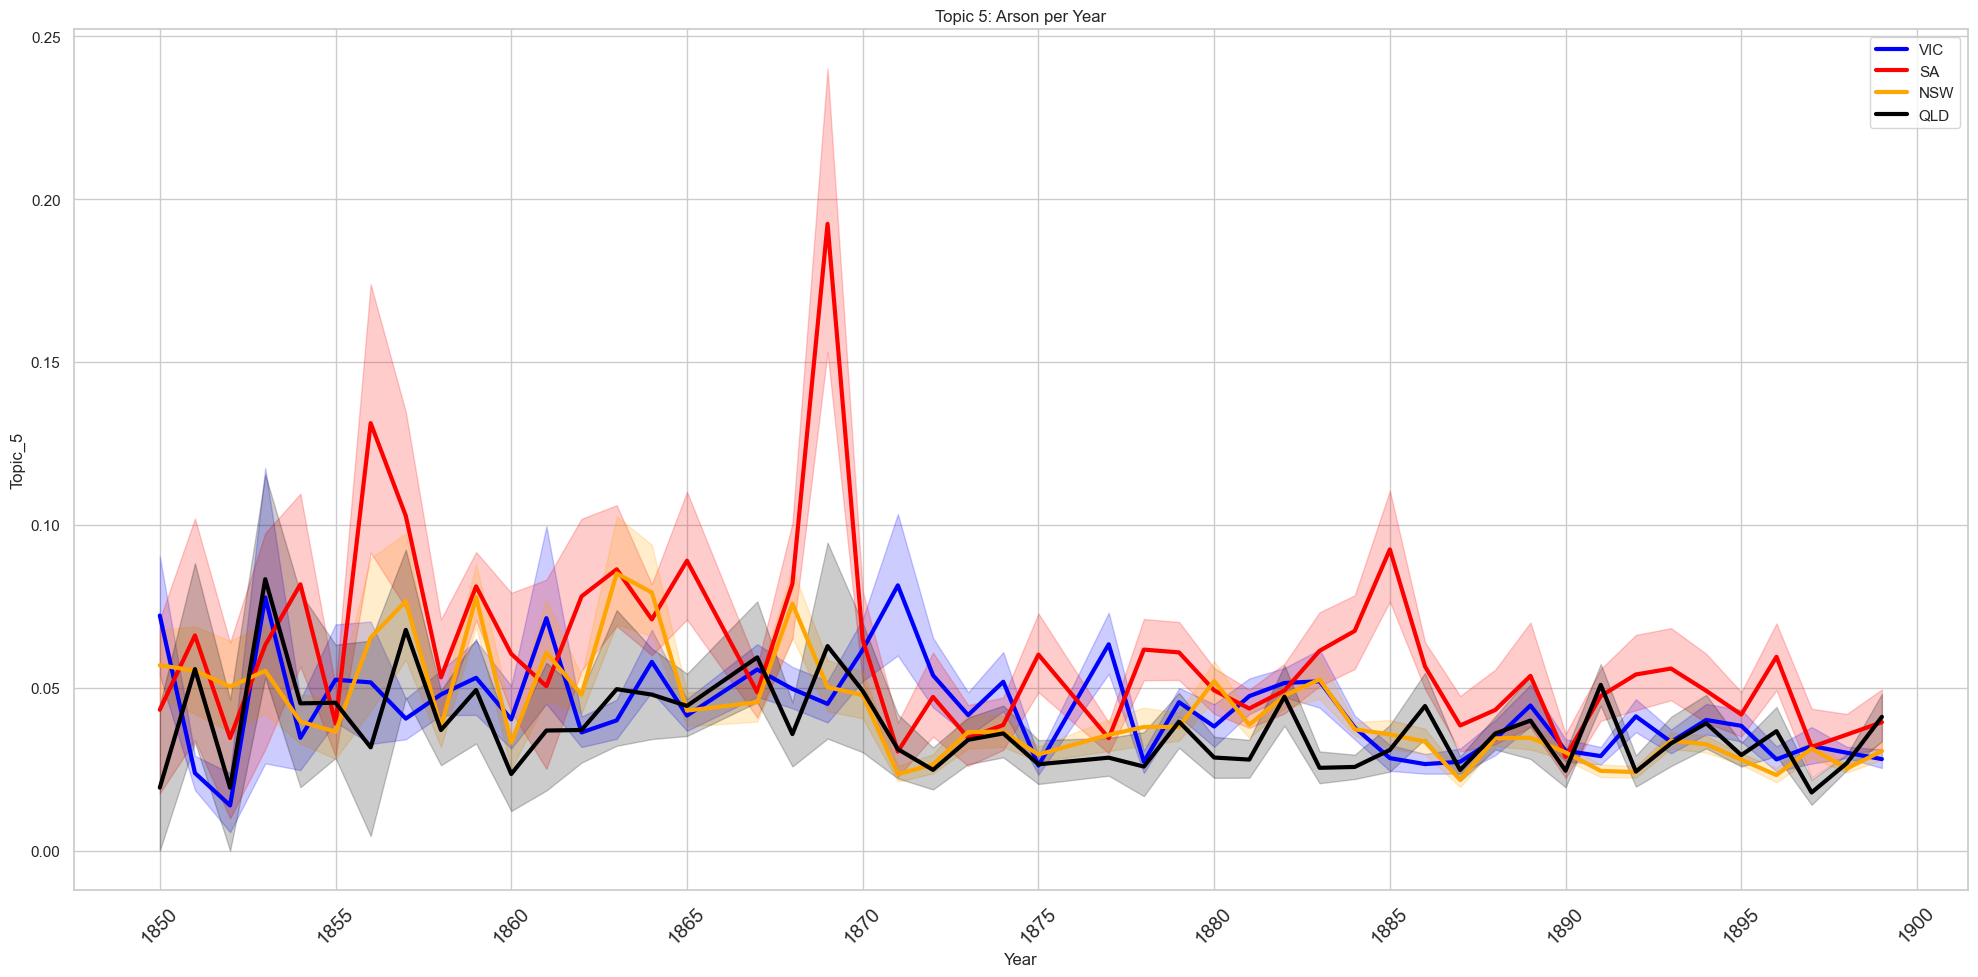

In [82]:
#Plot Topic_5 per year as a line graph and create a different line for each entry in 'State' column: VIC, NSW, QLD, SA, TAS, WA, NT, ACT,
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='Topic_5', data=doc_topics_df_metadata[doc_topics_df_metadata['State'] == 'VIC'], color='blue', linewidth=3, label='VIC')
sns.lineplot(x='Year', y='Topic_5', data=doc_topics_df_metadata[doc_topics_df_metadata['State'] == 'SA'], color='red', linewidth=3, label='SA')
sns.lineplot(x='Year', y='Topic_5', data=doc_topics_df_metadata[doc_topics_df_metadata['State'] == 'NSW'], color='orange', linewidth=3, label='NSW')
sns.lineplot(x='Year', y='Topic_5', data=doc_topics_df_metadata[doc_topics_df_metadata['State'] == 'QLD'], color='black', linewidth=3, label='QLD')

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title('Topic 5: Arson per Year')
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()

There is more reporting from SA than other colonies on coverage of arson and legal proceedings.

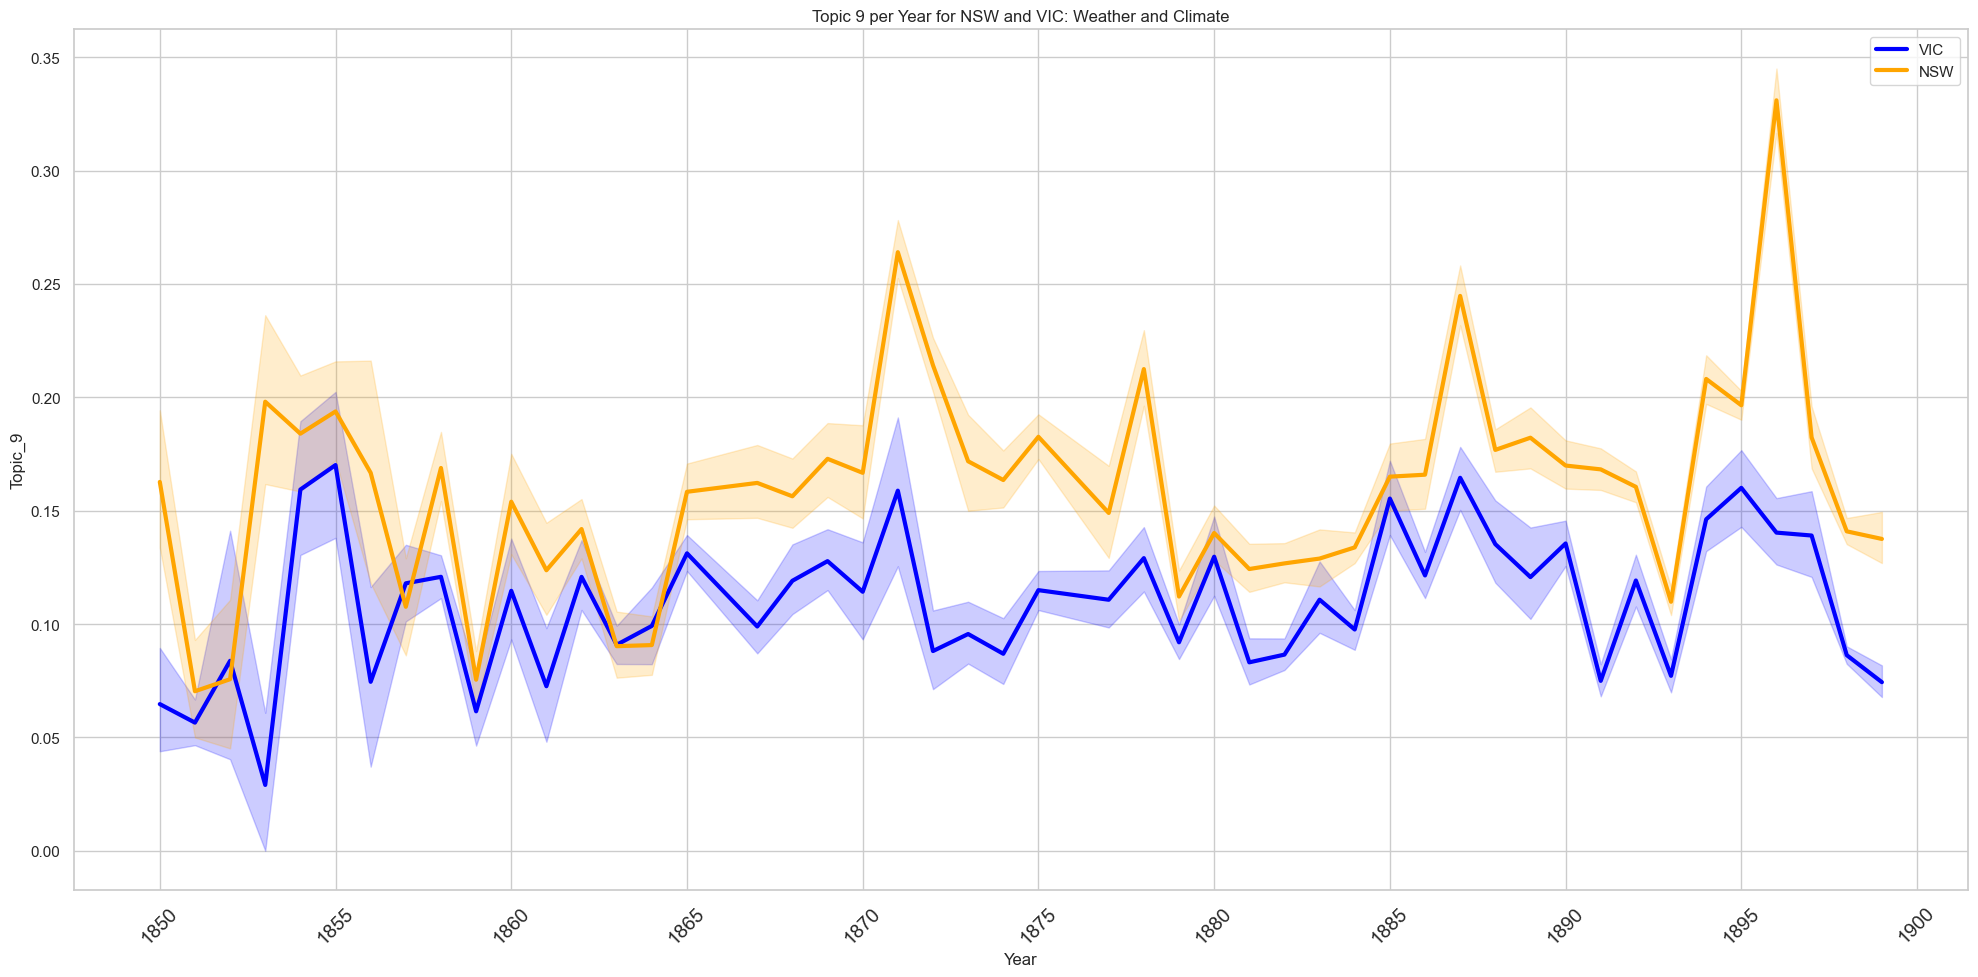

In [83]:
#Plot Topic_9 per year as a line graph and create a different line for each entry in 'State' column: VIC, NSW, QLD, SA, TAS, WA, NT, ACT,
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='Topic_9', data=doc_topics_df_metadata[doc_topics_df_metadata['State'] == 'VIC'], color='blue', linewidth=3, label='VIC')
sns.lineplot(x='Year', y='Topic_9', data=doc_topics_df_metadata[doc_topics_df_metadata['State'] == 'NSW'], color='orange', linewidth=3, label='NSW')

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title('Topic 9 per Year for NSW and VIC: Weather and Climate')
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()

# Topic Modelling of Titles

## Topics

 **Topic 0: country weather pastoral agricultural stock warragul death movements april crops intelligence state july meeting yass creek queensland districts drought sheep**

This includes titles such as:
-  "Queensland Stock Movements and State of the Country. 
- (Queenslander, May 27.)" and "Pastoral and Agricultural Intelligence, 
- Stock Movements, &c.", "Condition of Stock, Pasture, Weather &c.", 
- "THE WEATHER, AGRICULTURE, PASTURE, AND CONDITION OF STOCK."

**Topic 1: summary zealand new wellington australian press letter association wollongong australasian england heavy associated burning maitland society many farmers last auckland**

"THE NOVELIST. AN AUSTRALIAN SQUIRE.  [BY THE AUTHOR OF " THE SQUATTER'S DREAM," &c. CHAPTEE XX,‚ÄîCONTINUED."
- "THE NATURALIST. MECHANICAL POWERS AND PRINCIPLES EXEMPLIFIED IN VEGETATION."
- "The Explorer. The Daintree and Bloomfield Exploration. II."
- "Australian Birds. ORCHARD AND VINEYARD PESTS. I. TRICHOGLOSSUS CONCINNUS, SHAW.  Musk Lorikeet, Musk Parrakeet, "Green Leek.""
- "Facts V Scraps" **lots of these**
The Explorer. The Daintree and Bloomfield Exploration. II.
The Explorer. The Daintree and Bloomfield Exploration. v.
Australian Birds. ORCHARD AND VINEYARD PESTS. I. TRICHOGLOSSUS CONCINNUS, SHAW.  Musk Lorikeet, Musk Parrakeet, "Green Leek."
THE SQUATTER'S DREAM. "A dream which was not all a dream."‚ÄîBYRON.
VOLCANIO DISTURBANCES IN NEW ZEALAND.
THE MONSOONALDEPRESSION. IMPROVING PROSPECTS OF A CHANGE.
[?]EMS OF INTEREST. [COLLECTED FROM ALL SOURCES]
NEW ZEALAND. DISTINGUISHED EXCURSIONISTS.
NEW ZEALAND. JUBILEE JAUNTS.
THE SQUATTER'S DREAM "Adream which was not all a dream."‚ÄîBYRON.


**Topic 2: tasmania friday editor evening week wagga published january tuesday brevities wednesday report launceston herald daily advertiser may argus thursday correspondence**

- "The Portland Guardian, ESTABLISHED 1842.) With which is incorporated The Portland Mirror. Published Every Monday, Wednesday and Friday Evening. FRIDAY, JANUARY 25, 1889."
- " THE BENDIGO ADVERTISER (PUBLISHED DAILY.) PROGRESSION, OUR RIGHTS, AND OUR RESOURCES. SANDHURST, THURSDAY, FEB. 17, 1887 THE SCHOOL OF MINES IMBROGLIO."
- "The Riverine Herald ECHUCA, MOAMA AND KERANG ADVERTISER. (PUBLISHED DAILY.) ECHUCA, WEDNESDAY, JANUARY 8, 1870."
- "THE BENDIGO ADVERTISER (PUBLISHED DAILY.) PROGRESSION, OUR RIGHTS, AND OUR RESOURCES. SANDHURST, TUESDAY, MAR. 8, 1881. PLAYING WITH TORPEDOES."
- "THE BENDIGO ADVERTISER PUBLISHED DALLY. PROGRESSION, OUR RIGHTS, AND OUR RESOURCES. SANDHURST, TUESDAY, FEB. 16, 1875. CONTAGIOUS DISEASES."
- "STOCK REPORTS, &c. Riverine Herald Office, Friday Evening."
- "The Riverine Herald (PUBLISHED DAILY.) ECHUCA, TUESDAY, MAY 21, 1889."
- "THE WEATHER, AGRICULTURE, & c."


**Topic 3: melbourne victoria january telegrams february correspondent latest colonial monday council march gippsland thursday london shire wednesday river friday december relief**

- "Latest Telegrams. COLONIAL TELEGRAMS. SPECIAL TELEGRAMS. VICTORIA. Melbourne, January 20."
- "TELEGRAPHIC INTELLIGENCE. VICTORIA. [from our Melbourne Correspondent]. Friday, January 27."
- "COLONIAL TELEGRAMS. SPECIAL TELEGRAMS.  VICTORIA. Melbourne, February 5."
- "COLONIAL TELEGRAMS. SPECIAL TELEGRAMS.  VICTORIA. Melbourne, February 3."
- "COLONIAL TELEGRAMS. SPECIAL TELEGRAMS. VICTORIA. Melbourne, January 31."
- "COLONIAL TELEGRAMS. SPECIAL TELEGRAMS. VICTORIA. Melbourne, February 16."

**Topic 4: news notes local general title items hobart day court port police epitome mercury events provincial topics goulburn courts yesterday rural**

- "THE MERCURY. BOBART: WEDNESDAY, DEC. l8, 1889. EPITOME OF NEWS."
- "THE MERCURY. HOBART: WEDNESDAY, JAN. 12, 1898. EPITOME OF NEWS."
- "THE MERCURY. HOBART: SATUHDAY, FEB. 12, 1898. EPITOME OF NEWS."
- "Local News and Notes."
- "Local and General news."
- "Local and General News."
- "Local and General News."
(the rest of this topic is just local and general news)

**Topic 5: october miscellaneous council victorian fatal narrow chronicle southern heat accident mems escape another short sharp shiny needles legislative outbreak large**

- "ANOTHER OUTBREAK. A NARROW ESCAPE. RAILTON, Wednesday."
- "THE WATTLE BARK INDUSTRY. DOES CULTIVATION PAY ?"
- "Needles. "Short, Sharp, Shiny.""
- "NEEDLES: "Short, Sharp, Shiny"
- "NEEDLES: "Short, Sharp, and Shiny."
- "NEEDLES: "Short, Sharp,Shiny.""

**Topic 6: saturday news country correspondents telegraph tuesday thursday queensland wednesday monday brisbane town march january morning november february august every published**

This topic is predominantly the column "Country News" which are correspondants reporting via Telegraph. 

- "THE Maffra Spectator. Published Every Monday and Thursday THURSDAY, JANUARY 6, 189[?]. THE MECHANICS' INSTITUTE"
- "The Advertiser. PUBLISHED EVERY TUESDAY, THURSDAY AND SATURDAY MORNING. Bairnsdale, Thursday, February 24, 1887."
- "The Advertiser. PUBLISHED EVERY TUESDAY, THURSDAY AND SATURDAY MORNING. Bairnsdale, Saturday, January 22, 1898."
- "COUNTRY NEWS. [BY TELEGRAPH.] (FROM OUR OWN CORRESPONDENTS.) DIMBOOLA, FRIDAY."
- "COUNTRY NEWS. [BY TELEGRAPH.] (FROM OUR OWN CORRESPONDENTS.) HORSHAM, THURSDAY."
- "COUNTRY NEWS. [BY TELEGRAPH.] (FROM OUR OWN CORRESPONDENTS.) ALBURY, TUESDAY."
- "COUNTRY NEWS. [BY TELEGRAPH.] (FROM OUR OWN CORRESPONDENTS.) ALBURY, FRIDAY."
- "COUNTRY NEWS. [From our Country Correspondents.] MENINGLE, MARCH 7."
- "COUNTRY NEWS. (FROM OUR CORRESPONDENTS.)  Albury.  February 16."

**Topic 7: bush fires fire telegraph great destructive disastrous near electric damage monday destroyed burnt extensive destruction tuesday terrible serious sunday heat**

Topic 7 is the bushfire topic. 

- "SERIOUS BUSH FIRE. SIX FARMERS BURNT OUT. TWO STATIONS INJURED. ALBURY, Monday." (1897)
- "Terrible Bush Fires. ADDITIONAL PARTICULARS OF DAMAGE. WHOLE STATIONS DESTROYED." (1893)
- "THE BUSH FIRES IN RIVERINA. VAST AREAS OF GRASS DESTROYED. ALBURY, THURSDAY." (1893)
- EXTENSIVE BUSH FIRES IN RIVERINA. VALUABLE PASTURES DESTROYED. ALBURY, SUNDAY.(1889)
- BUSH AND GRASS FIRES. SERIOUS FIRE THROUGH AN ENGINE SPARK. ROMSEY, THURSDAY.(1895)
- DESTRUCTIVE BUSH FIRES. GREAT LOSS OF PROPERTY. ALBURY, TUESDAY.(1891)
- - BUSH FIRE NEAR BENALLA. [BY TELEGRAPH.] (FROM OUR OWN CORRESPONDENT.) BENALLA, FRIDAY. (1884)
- EXTENSIVE BUSH FIRE AT ALBURY. [BY TELEGRAPH.] (FROM OUR OWN CORRESPONDENT.) ALBURY, TUESDAY. (1882)
- BUSH FIRES NEAR ALBURY. [BY TELEGRAPH.] (FROM OUR CORRESPONDENT.) ALBURY, SUNDAY. (1888)
- Extensive Bush Fires. GREAT DESTRUCTION OF PROPERTY COOLAMON, Tuesday.(1891)
- Immense Bush Fires. A LIFE LOST. GREAT DESTRUCTION OF PROPERTY.(1892)
- THE HEAT WAVE. SERIOUS BUSH FIRES. GREAT DAMAGE TO PROPERTY. (1894)
- THE BUSH FIRES. A BIG BLAZE AT GLENROWAN. BEECH WORTH, Wednesday.(1899)
- BUSH FIRE NEAR JERILDERIE. ALLEGED INCENDIARISM. ALBURY, MONDAY. (1890)
- "THE GREAT BUSH FIRES IN VICTORIA‚ÄîDESTRUCTION OF PROPERTY‚ÄîHOW LIVES WERE SAVED." (1875)


**Topic 8: district australia news intelligence march brief current topics west western bay forest cattle shipping councils perth coast railway hill east**

*Predominantly shipping intelligene* 

GLEN TAGGART GOLDFIELD. Glen Taggart, March 1.
ESPERANCE BAY NEWS. ESPERANCE BAY, March 15.
THE VINEYARDS OF THE WESTERN DISTRICT. GLEN DARRIWELL, LETHBRIDGE.
THE VINEYARDS OF THE WESTERN DISTRICT. GLEN DARRIWELL, LETHBRIDGE.
THE VINEYARDS OF THE WESTERN DISTRICT. GLEN DARRIWELL, LETHBRIDOE.
County Intelligence. Rookwood and Potts‚Äô Hill.
BEAUTIES OF LORD HOWE Its Wonderful Flora. And Glorious Scenery. NO. III.
THE TRAVELLER. TO SANDAKAN IN A SAILING BARQUE. No. VII.
YACHTS AND YACHTING. THE GLENELG YACHT CLUB CUP.
STEAM COMMUNICATION WITH AUSTRALIA. (From the S. M. Herald, Nov. 12.
SHIPPING INTELLIGENCE. HOBSON'S BAY. ARRIVED.‚ÄîApril 1.
SHIPPING INTELLIGENCE. HOBSON'S BAY.
SHIPPING INTELLIGENCE. HOBSON'S BAY.
SHIPPING INTELLIGENCE. HOBSON'S BAY.

**Topic 9: sydney south new wales intercolonial adelaide january december telegrams telegraphic tuesday friday mount thursday february monday wednesday november herald correspondent**

INTERCOLONIAL TELEGRAMS. NEW SOUTH WALES. [BY SPECIAL WIRE.] (FROM OUR CORRESPONDENTS.) SYDNEY, FRIDAY.
INTERCOLONIAL TELEGRAMS. NEW SOUTH WALES. [BY SPECIAL WIRE.] (FROM OUR CORRESPONDENTS.) SYDNEY, TUESDAY.
INTERCOLONIAL TELEGRAMS. NEW SOUTH WALES. [BY SPECIAL WIRE.] (FROM OUR CORRESPONDENT.) SYDNEY, WEDNESDAY.
INTERCOLONIAL TELEGRAMS. NEW SOUTH WALES. [BY SPECIAL WIRE.] (FROM OUR CORRESPONDENT.) SYDNEY, FRIDAY.
INTERCOLONIAL TELEGRAMS. NEW SOUTH WALES. [BY SPECIAL WIRE.] (FROM OUR CORRESPONDENTS.) SYDNEY, SUNDAY.
INTERCOLONIAL TELEGRAMS. NEW SOUTH WALES. [BY SPECIAL WIRE.] (FROM OUR CORRESPONDENTS.) SYDNEY, WEDNESDAY.
INTERCOLONIAL TELEGRAMS. NEW SOUTH WALES. [BY SPECIAL WIRE.] (FROM OUR CORRESPONDENT.) SYDNEY, TUESDAY.
INTERCOLONIAL TELEGRAMS. NEW SOUTH WALES. [BY SPECIAL WIRE.] (FROM OUR CORRESPONDENT.) SYDNEY, WEDNESDAY.
INTERCOLONIAL TELEGRAMS. NEW SOUTH WALES. [BY SPECIAL WIRE.] (FROM OUR CORRESPONDENT.) SYDNEY, TUESDAY.
INTERCOLONIAL TELEGRAMS. NEW SOUTH WALES. [BY SPECIAL WIRE.] (FROM OUR CORRESPONDENT.) SYDNEY, TUESDAY.
INTERCOLONIAL TELEGRAMS. NEW SOUTH WALES. [BY SPECIAL WIRE.] (FROM OUR CORRESPONDENTS.) SYDNEY, MONDAY.
INTERCOLONIAL TELEGRAMS. NEW SOUTH WALES. [BY SPECIAL WIRE.] (FROM OUR CORRESPONDENT.) SYDNEY, WEDNESDAY.
INTERCOLONIAL TELEGRAMS. NEW SOUTH WALES. [BY SPECIAL WIRE.] (FROM OUR CORRESPONDENT.) SYDNEY, MONDAY.
TELEGRAPHIC DESPATCHES. NEW SOUTH WALES. (FROM OUR OWN CORRESPONDEST.) SYDNEY, TUESDAY.
TELEGRAPHIC DESPATCHES. NEW SOUTH WALES, (FROM OUR OWN CORRESPONDENTS.) SYDNEY, SONDAY.
TELEGRAPHIC DESPATCHES. NEW SOUTH WALES. (FROM OUR OWN CORRESPONNDENT.) SYDNEY, WEDNESDAY.
TELEGRAMS. INTERCOLONIAL. NEW SOUTH WALES. SYDNEY, December 2.
TELEGRAMS. INTERCOLONIAL. NEW SOUTH WALES. SYDNEY, January 7.

This modelling mostly demonstrates what articles reporting on bushfires occurred in. Including Shipping Reports, Intercolonial Telegrams, and Local News, and also general reporting such as "Brevities" and "Needles". The topic of interest for our purposes is topic 7 which is the bushfire topic for which there is a notable increase from approx 1886 onwards. Significantly, TAS is represented in this topic.

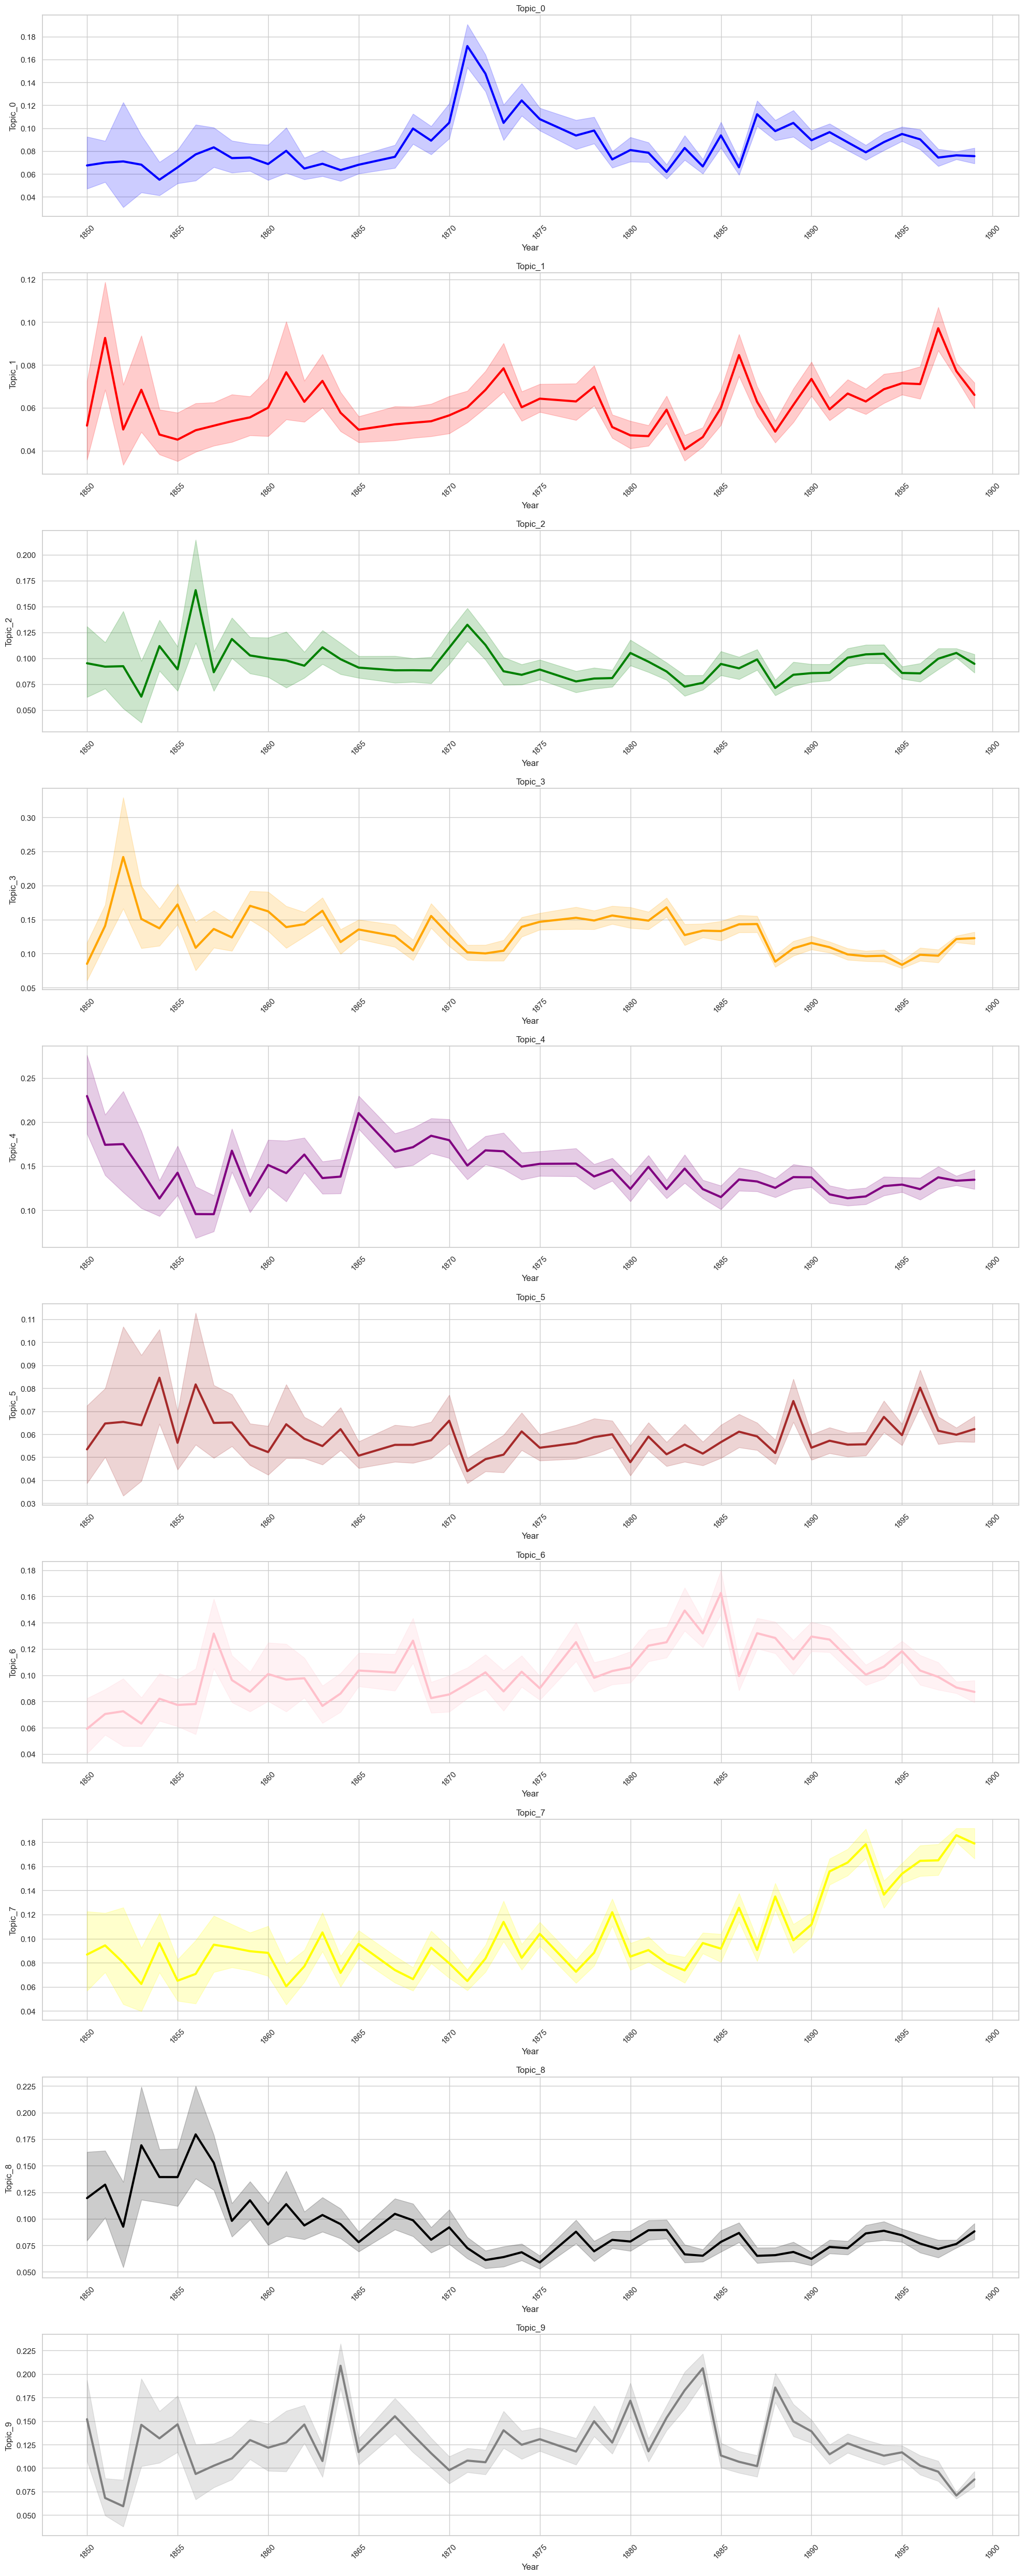

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load in the CSV and create a dataframe
title_topic_metadata = pd.read_csv("title_topic_metadata.csv")

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(20, 50))

# List of topics
topics = ['Topic_' + str(i) for i in range(10)]

# Colors for each line
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'yellow', 'black', 'grey']

# Plot each topic in its own subplot
for i, topic in enumerate(topics):
    sns.lineplot(ax=axes[i], x='Year', y=topic, data=title_topic_metadata, color=colors[i], linewidth=3)
    axes[i].set_title(topic)
    axes[i].xaxis.set_major_locator(ticker.MultipleLocator(5))
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


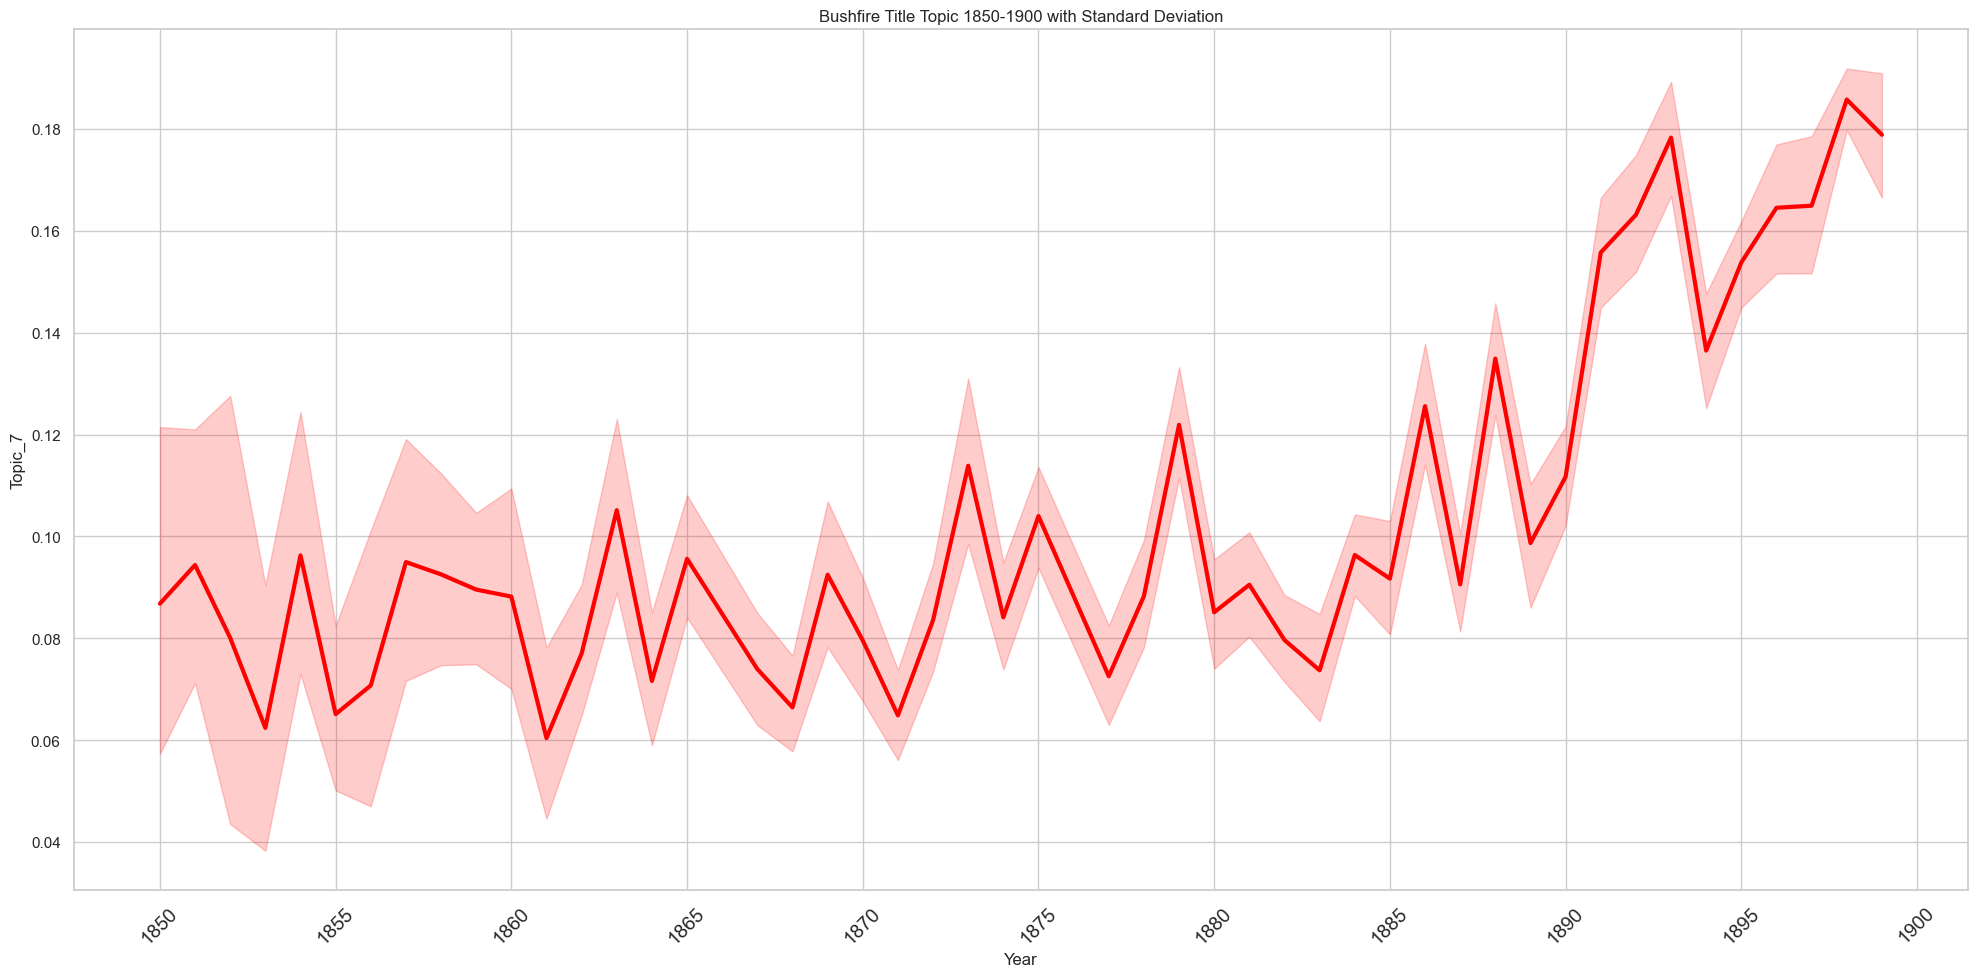

In [85]:
#plot topic 7 per year as a line graph
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='Topic_7', data=title_topic_metadata, color='red', linewidth=3)

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title('Bushfire Title Topic 1850-1900 with Standard Deviation')
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()


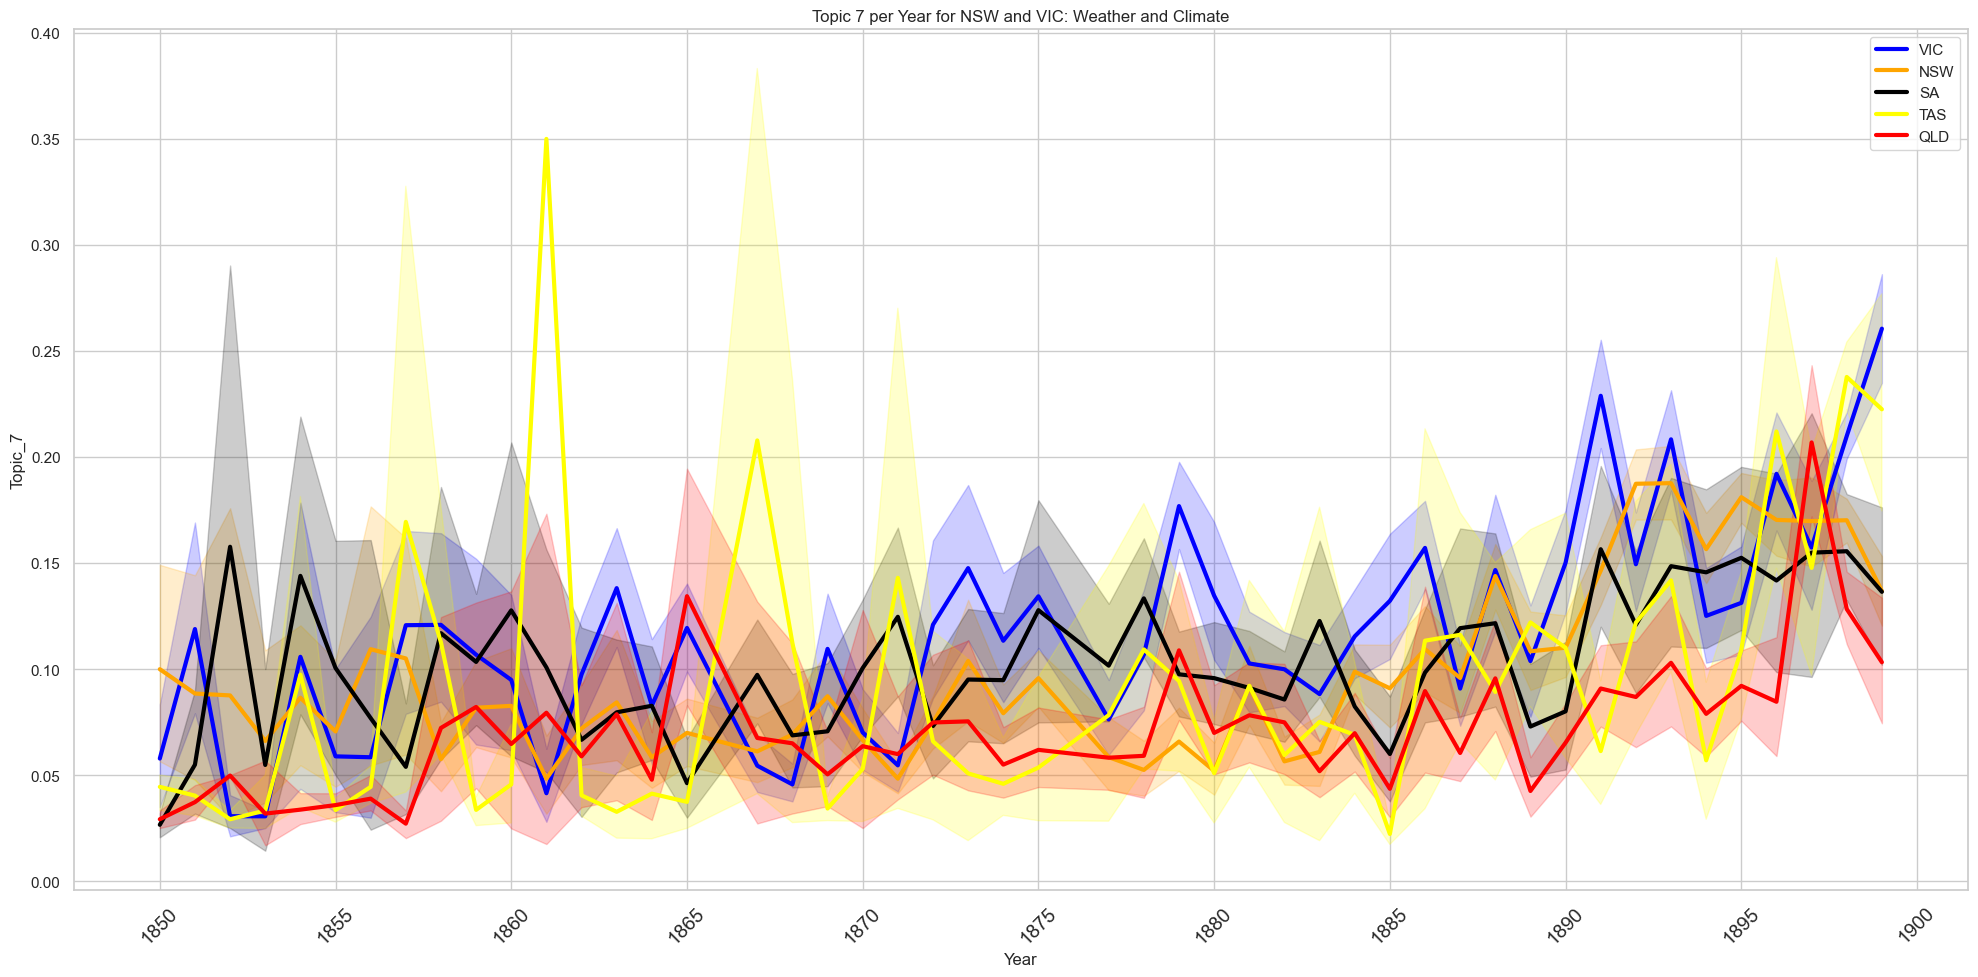

In [91]:
#Plot Topic_7 per year as a line graph and create a different line for each entry in 'State' column: VIC, NSW, QLD, SA, TAS, WA, NT, ACT,
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='Topic_7', data=title_topic_metadata[title_topic_metadata['State'] == 'VIC'], color='blue', linewidth=3, label='VIC')
sns.lineplot(x='Year', y='Topic_7', data=title_topic_metadata[title_topic_metadata['State'] == 'NSW'], color='orange', linewidth=3, label='NSW')
sns.lineplot(x='Year', y='Topic_7', data=title_topic_metadata[title_topic_metadata['State'] == 'SA'], color='black', linewidth=3, label='SA')
sns.lineplot(x='Year', y='Topic_7', data=title_topic_metadata[title_topic_metadata['State'] == 'TAS'], color='yellow', linewidth=3, label='TAS')
sns.lineplot(x='Year', y='Topic_7', data=title_topic_metadata[title_topic_metadata['State'] == 'QLD'], color='red', linewidth=3, label='QLD')

# Set x-axis ticks to occur every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title('Topic 7 per Year for NSW and VIC: Weather and Climate')
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()

# Topic Model of Bushfire Corpus
This section contains the code that was used to generate the topic modelling. 

We will now conduct a topic model of the bushfire corpus to see if there are any changes in the topics of reporting over time. We will use the processed dataset for topic modelling so that we can segment results by state.

"\n\n#The first step will be to use the df_bushfire dataframe and create \n# a 'Year' column that contains the year for each entry in the dataframe\n\n# Add 'Year' column to df_bushfire dataframe\ndf_bushfire['Year'] = pd.DatetimeIndex(df_bushfire['date']).year\n\n#create a new df from df_bushfire that will include the text from \n#the newspaper article in a new column called 'text'.\n#the text is stored in the folder '1_Fuzzy_Extraction_Output' that is in the same directory as this notebook, \n#and each sub-folder contains the text for each year. The naming convention is '1850_Fuzzy_Extraction_Output' for example, then '1851_Fuzzy_Extraction_Output' and so on.\n#I will use the filename in the df_bushfire dataframe to find the correct text file and extract the text from that file and add it to the new dataframe\n#The naming convention for filenames is as follows: '1850_Output18500105-8-697324 (1 of 1).txt', and '1850_Output18501204-35-12923034 (1 of 1).txt' etc. \n#to match the filenam

'\nimport pandas as pd\nimport gensim\nfrom gensim import corpora\nfrom gensim.models.ldamodel import LdaModel\nimport nltk\nfrom nltk.tokenize import word_tokenize\nfrom nltk.corpus import stopwords\nimport pyLDAvis\nimport pyLDAvis.gensim_models as gensimvis\nimport warnings\n\nwarnings.filterwarnings("ignore", category=DeprecationWarning)\n\n# Download necessary NLTK data\nnltk.download(\'punkt\')\nnltk.download(\'stopwords\')\n\n# Set of English stopwords\nstop_words = set(stopwords.words(\'english\'))\n\n# Function to preprocess text\ndef preprocess_text(text):\n    # Ensure text is a string\n    if not isinstance(text, str):\n        return []\n    # Tokenize text\n    tokens = word_tokenize(text)\n    # Remove stopwords and punctuation, and convert to lower case\n    tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]\n    return tokens\n\n# Apply preprocessing to the texts\ntexts = df_bushfire[\'title\'].apply(preprocess_text)\n\n\n\n